## Final Project Submission
    "* Student name: Deepali Sharma\n",
    "* Student pace: self paced \n",
    "* Scheduled project review date/time: \n",
    "* Instructor name: Abhineet Kulkarni\n",
    "* Blog post URL:\n"

## The goal of this Project is to make three recommendations for Microsoft that plans to get into the business of movie making. Based on our analysis we need to provide an input about the kind of movies that are profitable and are doing great

Import all the needed libraries for this project

In [1]:
# Run this cell without changes
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Define some functions that I need for the analysis.
The function *convert_dollars_to_float* takes a dataframe and a column which is string but contains money in dollars, and converts it into a float

In [2]:
def convert_dollars_to_float(df, col):
    df[col] = df[col].str.replace('$', '')
    df[col] = df[col].str.replace(',', '')
    df[col] = df[col].astype(float)
    return df[col]    

The three functions below are used to get mean, std and sum values for a list of dataframes.

In [3]:
def get_mean_values(df_list,col):
    mean_vals_list=[]
    for df in df_list:
        mean_vals_list.append(round(df[col].mean(),2))
    return mean_vals_list

In [4]:
def get_std_values(df_list, col):
    std_vals_list=[]
    for df in df_list:
        std_vals_list.append(round(df[col].std(),2))
    return std_vals_list

In [5]:
def get_sum_values(df_list,col):
    sum_vals_list=[]
    for df in df_list:
        sum_vals_list.append(round(df[col].sum(),2))
        print(round(df[col].sum(),2))
    return sum_vals_list

In [ ]:
def df_get_monthly_profits(df):
    mask       = (df['release_date'].dt.month >10) | (df['release_date'].dt.month == 1)
    df_nov_jan = df.loc[mask]
    mask       = (df['release_date'].dt.month >1) & (df['release_date'].dt.month <= 4)
    df_feb_apr = df.loc[mask]
    mask       = (df['release_date'].dt.month >4) & (df['release_date'].dt.month <= 7)
    df_may_jul = df.loc[mask]
    mask       = (df['release_date'].dt.month >7) & (df['release_date'].dt.month <= 10)
    df_aug_oct = df.loc[mask]
    list_profit =[df_nov_jan['profit'].mean(),df_feb_apr['profit'].mean(),df_may_jul['profit'].mean(), df_aug_oct['profit'].mean()]
    return list_profit   

Open the connection to the database and load the sql tables. I will be using the tables *movie_basics, 
movie_ratings, persons* and *directors*.

In [6]:
conn = sqlite3.Connection("zippedData/im.db")
conn

In [7]:
q0 = """
SELECT *
FROM movie_basics
;
"""
df_movie_basics=pd.read_sql(q0, conn)
df_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [8]:
#df_movie_basics.drop(columns=['runtime_minutes'],axis=1)
df_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [9]:
q0 = """
SELECT *
FROM movie_ratings
;
"""

df_movie_ratings=pd.read_sql(q0, conn)
df_movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [10]:
q0 = """
SELECT *
FROM movie_akas
;
"""

df_movie_akas=pd.read_sql(q0, conn)
df_movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [11]:
df_movie_akas[df_movie_akas['language']=='en']

,movie_id,ordering,title,region,language,types,attributes,is_original_title
87,tt10027708,2,Miguelito,XWW,en,imdbDisplay,None,0.0
89,tt10027708,4,Miguelito,AU,en,None,None,0.0
95,tt1014759,10,Alice Dar Sarzamin E Ajayeb,IE,en,imdbDisplay,None,0.0
127,tt1014759,3,Alice in Wonderland,JP,en,None,None,0.0
142,tt10225354,3,Returning Home,XWW,en,alternative,None,0.0
...,...,...,...,...,...,...,...,...
331679,tt9644084,3,The Breath,XWW,en,alternative,None,0.0
331680,tt9654246,1,The Wild Man of the North,XWW,en,imdbDisplay,None,0.0
331683,tt9657946,1,Homing,XWW,en,imdbDisplay,None,0.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0


In [12]:
df_movie_akas.region.value_counts()

US      51490
XWW     18467
RU      13817
DE      11634
FR      10990
        ...  
CSHH        1
CF          1
KN          1
VC          1
LS          1
Name: region, Length: 213, dtype: int64

In [13]:
df_movie_akas[df_movie_akas['region']=='US']

,movie_id,ordering,title,region,language,types,attributes,is_original_title
12,tt0369610,21,Jurassic World 3D,US,None,None,3-D version,0.0
20,tt0369610,29,Jurassic World,US,None,None,None,0.0
21,tt0369610,2,Ebb Tide,US,None,None,fake working title,0.0
28,tt0369610,36,Jurassic Park IV,US,None,working,None,0.0
37,tt0369610,44,Jurassic Park 4,US,None,None,informal alternative title,0.0
...,...,...,...,...,...,...,...,...
331645,tt9310460,6,Coconut the Little Dragon 2 Into the Jungle,US,None,imdbDisplay,None,0.0
331654,tt9358044,2,Hail Satan?,US,None,imdbDisplay,None,0.0
331673,tt9562694,5,Alien Warfare,US,None,imdbDisplay,None,0.0
331686,tt9705860,1,Dusan Vukotic Croatian Oscar Winner,US,None,imdbDisplay,None,0.0


# <span style="color:red"> **I should check if using region (USA) brings any change in the distriutions below. For this I will have to Join movie_akas sql table. I may come back to this if I have some more time** text</span>
#### Here I am quering over many SQL tables. My goal is to get one table that has info about movies, genres, ratings and directors. This definitely will have less data as compared to individual tables, but we need to have all this info for any given movie to do some sensible analysis.

In [14]:
q0 = """
SELECT 
    mbasics.movie_id,
    mbasics.primary_title,
    mbasics.start_year,
    mbasics.genres,
    mbasics.runtime_minutes,
    p.primary_name,
    p.person_id,
    mratings.averagerating,
    mratings.numvotes,
    pr.category
    FROM movie_basics AS mbasics
JOIN
    movie_ratings AS mratings
    USING(movie_id)
JOIN
    directors AS dir
    USING(movie_id)
JOIN
    principals AS pr
    USING(movie_id)    
JOIN
    persons AS p
    USING(person_id)      
WHERE
    pr.category='director'
;
"""
df_movie_db=pd.read_sql(q0, conn)
df_movie_db

,movie_id,primary_title,start_year,genres,runtime_minutes,primary_name,person_id,averagerating,numvotes,category
0,tt0323808,The Wicker Tree,2011,"Drama,Horror",96.0,Robin Hardy,nm0362736,3.9,2328,director
1,tt0417610,Asleep in the Sun,2010,Fantasy,83.0,Alejandro Chomski,nm1145057,6.4,80,director
2,tt0417610,Asleep in the Sun,2010,Fantasy,83.0,Alejandro Chomski,nm1145057,6.4,80,director
3,tt0469152,Smoking/Non-Smoking,2011,Drama,84.0,Alyssa R. Bennett,nm0707738,7.2,88,director
4,tt0469152,Smoking/Non-Smoking,2011,Drama,84.0,Alyssa R. Bennett,nm0707738,7.2,88,director
...,...,...,...,...,...,...,...,...,...,...
437148,tt9670894,Veergati,2019,Action,61.0,Vishal Desai,nm4039933,6.9,10,director
437149,tt9670894,Veergati,2019,Action,61.0,Raju Desai,nm7840985,6.9,10,director
437150,tt9670894,Veergati,2019,Action,61.0,Raju Desai,nm7840985,6.9,10,director
437151,tt9670894,Veergati,2019,Action,61.0,Raju Desai,nm7840985,6.9,10,director


Check for the duplicate entries

In [15]:
df_movie_db[df_movie_db.duplicated()==True]

,movie_id,primary_title,start_year,genres,runtime_minutes,primary_name,person_id,averagerating,numvotes,category
2,tt0417610,Asleep in the Sun,2010,Fantasy,83.0,Alejandro Chomski,nm1145057,6.4,80,director
4,tt0469152,Smoking/Non-Smoking,2011,Drama,84.0,Alyssa R. Bennett,nm0707738,7.2,88,director
6,tt0475290,"Hail, Caesar!",2016,"Comedy,Drama,Music",106.0,Ethan Coen,nm0001053,6.3,111422,director
8,tt0475290,"Hail, Caesar!",2016,"Comedy,Drama,Music",106.0,Joel Coen,nm0001054,6.3,111422,director
9,tt0475290,"Hail, Caesar!",2016,"Comedy,Drama,Music",106.0,Ethan Coen,nm0001053,6.3,111422,director
...,...,...,...,...,...,...,...,...,...,...
437147,tt9670894,Veergati,2019,Action,61.0,Vishal Desai,nm4039933,6.9,10,director
437148,tt9670894,Veergati,2019,Action,61.0,Vishal Desai,nm4039933,6.9,10,director
437149,tt9670894,Veergati,2019,Action,61.0,Raju Desai,nm7840985,6.9,10,director
437150,tt9670894,Veergati,2019,Action,61.0,Raju Desai,nm7840985,6.9,10,director


Removing some duplicate entries. Need to investiagte why they are there!

In [16]:
df_movie_db=df_movie_db.drop_duplicates()
df_movie_db

,movie_id,primary_title,start_year,genres,runtime_minutes,primary_name,person_id,averagerating,numvotes,category
0,tt0323808,The Wicker Tree,2011,"Drama,Horror",96.0,Robin Hardy,nm0362736,3.9,2328,director
1,tt0417610,Asleep in the Sun,2010,Fantasy,83.0,Alejandro Chomski,nm1145057,6.4,80,director
3,tt0469152,Smoking/Non-Smoking,2011,Drama,84.0,Alyssa R. Bennett,nm0707738,7.2,88,director
5,tt0475290,"Hail, Caesar!",2016,"Comedy,Drama,Music",106.0,Ethan Coen,nm0001053,6.3,111422,director
7,tt0475290,"Hail, Caesar!",2016,"Comedy,Drama,Music",106.0,Joel Coen,nm0001054,6.3,111422,director
...,...,...,...,...,...,...,...,...,...,...
437133,tt9592190,Luonnonlaki,2019,Documentary,70.0,Verena Netzer,nm7006696,7.4,8,director
437139,tt9670776,Code of Tumas,2018,Biography,86.0,Eimantas Belickas,nm2277447,8.0,9,director
437140,tt9670894,Veergati,2019,Action,61.0,Vishal Desai,nm4039933,6.9,10,director
437143,tt9670894,Veergati,2019,Action,61.0,Raju Desai,nm7840985,6.9,10,director


In [17]:
df_movie_db[df_movie_db["primary_name"]=="Joel Coen"]

,movie_id,primary_title,start_year,genres,runtime_minutes,primary_name,person_id,averagerating,numvotes,category
7,tt0475290,"Hail, Caesar!",2016,"Comedy,Drama,Music",106.0,Joel Coen,nm0001054,6.3,111422,director
72519,tt2042568,Inside Llewyn Davis,2013,"Drama,Music",104.0,Joel Coen,nm0001054,7.5,123759,director
73042,tt1403865,True Grit,2010,"Adventure,Drama,Western",110.0,Joel Coen,nm0001054,7.6,284034,director
403286,tt6412452,The Ballad of Buster Scruggs,2018,"Comedy,Drama,Musical",133.0,Joel Coen,nm0001054,7.3,87418,director


In [18]:
df_movie_db[df_movie_db["primary_name"]=="Ethan Coen"]

,movie_id,primary_title,start_year,genres,runtime_minutes,primary_name,person_id,averagerating,numvotes,category
5,tt0475290,"Hail, Caesar!",2016,"Comedy,Drama,Music",106.0,Ethan Coen,nm0001053,6.3,111422,director
72517,tt2042568,Inside Llewyn Davis,2013,"Drama,Music",104.0,Ethan Coen,nm0001053,7.5,123759,director
73039,tt1403865,True Grit,2010,"Adventure,Drama,Western",110.0,Ethan Coen,nm0001053,7.6,284034,director
403282,tt6412452,The Ballad of Buster Scruggs,2018,"Comedy,Drama,Musical",133.0,Ethan Coen,nm0001053,7.3,87418,director


### Since there are duplicate entries when there is a more than one director for a given movie. I am using the below groupby feature to add the directors in one row

In [19]:
#df_movie = df_movie_db.groupby(['movie_id','primary_title']).reset_index()#.apply(', '.join).reset_index()
df_movie_db = df_movie_db.groupby('movie_id').agg({'primary_title':'first',
                                       'averagerating':'first',
                                       'numvotes':'first',
                                       'genres':'first',
                                       'start_year':'first',
                             'primary_name': ', '.join, 
                             'person_id': ', '.join, 
                             }).reset_index()

#df_movie = df_movie_db.groupby(['movie_id','primary_name','person_id','primary_title','start_year',"genres","averagerating","numvotes"])['primary_name'].apply(', '.join).reset_index()

In [20]:
df_movie_db[df_movie_db.duplicated()==True]

,movie_id,primary_title,averagerating,numvotes,genres,start_year,primary_name,person_id


In [21]:
df_movie_db[df_movie_db['primary_name'].str.contains('Joel Coen')]

,movie_id,primary_title,averagerating,numvotes,genres,start_year,primary_name,person_id
148,tt0475290,"Hail, Caesar!",6.3,111422,"Comedy,Drama,Music",2016,"Ethan Coen, Joel Coen","nm0001053, nm0001054"
2401,tt1403865,True Grit,7.6,284034,"Adventure,Drama,Western",2010,"Ethan Coen, Joel Coen","nm0001053, nm0001054"
14543,tt2042568,Inside Llewyn Davis,7.5,123759,"Drama,Music",2013,"Ethan Coen, Joel Coen","nm0001053, nm0001054"
56437,tt6412452,The Ballad of Buster Scruggs,7.3,87418,"Comedy,Drama,Musical",2018,"Ethan Coen, Joel Coen","nm0001053, nm0001054"


In [22]:
df_movie_db[df_movie_db['primary_title']=='Hail, Caesar!']

,movie_id,primary_title,averagerating,numvotes,genres,start_year,primary_name,person_id
148,tt0475290,"Hail, Caesar!",6.3,111422,"Comedy,Drama,Music",2016,"Ethan Coen, Joel Coen","nm0001053, nm0001054"


In [23]:
df_movie_db['primary_title'].value_counts()

Together                        9
The Return                      9
Lucky                           8
Homecoming                      8
Broken                          8
                               ..
Here Comes Uncle Joe            1
Mussum, Um filme do Cacildis    1
MonaLisa Story                  1
The Sex Cannon Ball Run         1
Uçurtmam tellere takildi        1
Name: primary_title, Length: 64375, dtype: int64

In [24]:
df_movie_db[df_movie_db['primary_title']=='Together']

,movie_id,primary_title,averagerating,numvotes,genres,start_year,primary_name,person_id
10517,tt1826955,Together,7.3,369,"Drama,Thriller",2011,Mladen Maticevic,nm1050198
17940,tt2198824,Together,4.2,204,"Drama,Romance",2013,Clarence Yiu-leung Fok,nm0284011
18662,tt2235823,Together,7.7,20,Documentary,2010,Liang Zhao,nm2420832
22652,tt2417568,Together,2.1,485,Drama,2012,Chao-jen Hsu,nm1314647
23365,tt2471538,Together,5.3,6,"Drama,Thriller",2012,Marcus Lee,nm5402524
23400,tt2473710,Together,6.9,7,Drama,2011,Ran Yan,nm8084230
36355,tt3753812,Together,6.8,5,Documentary,2014,Maciej Adamek,nm0010622
54404,tt6111634,Together,8.5,33,Romance,2018,Paul Duddridge,nm1548930
66571,tt9097086,Together,7.2,35,Drama,2018,Marko Santic,nm2414753


In [25]:
df_movie_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67751 entries, 0 to 67750
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       67751 non-null  object 
 1   primary_title  67751 non-null  object 
 2   averagerating  67751 non-null  float64
 3   numvotes       67751 non-null  int64  
 4   genres         67133 non-null  object 
 5   start_year     67751 non-null  int64  
 6   primary_name   67751 non-null  object 
 7   person_id      67751 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 4.1+ MB


In [26]:
df_movie_db["genres"].value_counts()

Drama                    10917
Documentary               9456
Comedy                    4976
Comedy,Drama              2394
Horror                    2391
                         ...  
History,Musical              1
Family,Music,Romance         1
Crime,Drama,News             1
Crime,Mystery,Western        1
Comedy,Sport,Western         1
Name: genres, Length: 893, dtype: int64

The genres are not so well defined and in many cases a movie falls under more than one category. This means
the way my analysis is going to be done will have some uncertanity/errors associated to it

In [27]:
#df_movie_db=df_movie_db.drop_duplicates(subset='person_id', keep="first")
#df_movie_db=df_movie_db.drop_duplicates(subset='movie_id', keep="first")
#df_movie_db=df_movie_db.drop_duplicates(subset='primary_title', keep="first")
df_movie_db['primary_title'].value_counts()

Together                        9
The Return                      9
Lucky                           8
Homecoming                      8
Broken                          8
                               ..
Here Comes Uncle Joe            1
Mussum, Um filme do Cacildis    1
MonaLisa Story                  1
The Sex Cannon Ball Run         1
Uçurtmam tellere takildi        1
Name: primary_title, Length: 64375, dtype: int64

Some movies have remakes I guess that is why different years which could be possible!! So I am going to keep these entries. 

In [28]:
df_movie_db[df_movie_db['primary_title']=='Together']

,movie_id,primary_title,averagerating,numvotes,genres,start_year,primary_name,person_id
10517,tt1826955,Together,7.3,369,"Drama,Thriller",2011,Mladen Maticevic,nm1050198
17940,tt2198824,Together,4.2,204,"Drama,Romance",2013,Clarence Yiu-leung Fok,nm0284011
18662,tt2235823,Together,7.7,20,Documentary,2010,Liang Zhao,nm2420832
22652,tt2417568,Together,2.1,485,Drama,2012,Chao-jen Hsu,nm1314647
23365,tt2471538,Together,5.3,6,"Drama,Thriller",2012,Marcus Lee,nm5402524
23400,tt2473710,Together,6.9,7,Drama,2011,Ran Yan,nm8084230
36355,tt3753812,Together,6.8,5,Documentary,2014,Maciej Adamek,nm0010622
54404,tt6111634,Together,8.5,33,Romance,2018,Paul Duddridge,nm1548930
66571,tt9097086,Together,7.2,35,Drama,2018,Marko Santic,nm2414753


In [29]:
df_movie_db['numvotes'].value_counts()

6         2538
5         2389
7         2199
8         1945
9         1703
          ... 
538720       1
4197         1
2150         1
10402        1
4098         1
Name: numvotes, Length: 7145, dtype: int64

In [30]:
#df_movie_db=df_movie_db.drop_duplicates(subset='primary_title', keep="first")
df_movie_db["primary_name"].value_counts()
#df_movie_db.head(50)

Nayato Fio Nuala     35
David DeCoteau       26
Larry Rosen          23
Ram Gopal Varma      20
Takashi Miike        19
                     ..
Gary Licker           1
Ian Sharp             1
Scott Bloom           1
Zaza Khalvashi        1
Michael Guinzburg     1
Name: primary_name, Length: 47278, dtype: int64

In [31]:
df_movie_db[df_movie_db['primary_name']=='Nayato Fio Nuala']

,movie_id,primary_title,averagerating,numvotes,genres,start_year,primary_name,person_id
4671,tt1590941,18+,6.7,83,Drama,2010,Nayato Fio Nuala,nm2551464
5285,tt1620421,Affair,4.1,58,Horror,2010,Nayato Fio Nuala,nm2551464
5286,tt1620435,Belum cukup umur,6.3,6,Drama,2010,Nayato Fio Nuala,nm2551464
5524,tt1631739,Kain kafan perawan,4.3,32,Horror,2010,Nayato Fio Nuala,nm2551464
5529,tt1631824,Te[rekam],3.6,13,Horror,2010,Nayato Fio Nuala,nm2551464
6101,tt1657318,Akibat pergaulan bebas,3.6,23,Drama,2010,Nayato Fio Nuala,nm2551464
6986,tt1693035,Not for Sale,4.0,11,Drama,2010,Nayato Fio Nuala,nm2551464
7610,tt1718842,Nakalnya anak muda,4.0,12,"Horror,Thriller",2010,Nayato Fio Nuala,nm2551464
8489,tt1748161,Pengantin Pantai Biru,2.5,26,Horror,2010,Nayato Fio Nuala,nm2551464
8491,tt1748168,Pocong jumat kliwon,2.6,16,"Comedy,Horror",2010,Nayato Fio Nuala,nm2551464


In [32]:
#df_genres=df_movie_db.groupby(['genres']).mean()
#df_genres
df_movie_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67751 entries, 0 to 67750
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       67751 non-null  object 
 1   primary_title  67751 non-null  object 
 2   averagerating  67751 non-null  float64
 3   numvotes       67751 non-null  int64  
 4   genres         67133 non-null  object 
 5   start_year     67751 non-null  int64  
 6   primary_name   67751 non-null  object 
 7   person_id      67751 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 4.1+ MB


In [33]:
df_movie_db[df_movie_db['primary_title'].str.contains("Avatar")]

,movie_id,primary_title,averagerating,numvotes,genres,start_year,primary_name,person_id
9237,tt1775309,Avatar,6.1,43,Horror,2011,Atsushi Wada,nm3786927
11205,tt1854506,Aliens vs. Avatars,1.6,1544,"Horror,Sci-Fi",2011,Lewis Schoenbrun,nm0006955
42354,tt4472992,Avatarachi Goshta,7.9,21,Drama,2014,Nitin Dixit,nm2587508
44337,tt4727514,The Last Avatar,5.1,49,Drama,2014,Jay Weidner,nm4506094
57558,tt6620864,The Avatar Project,3.8,5,Thriller,2017,Tiziano Cella,nm4892477


In [34]:
df_movie_db[df_movie_db['genres'].isnull()]

,movie_id,primary_title,averagerating,numvotes,genres,start_year,primary_name,person_id
16,tt0253093,Gangavataran,6.6,8,None,2018,"Madhukar Bavdekar, Dhundiraj Govind Phalke","nm0062580, nm0679610"
29,tt0326592,The Overnight,7.5,24,None,2010,Jed I. Goodman,nm1208371
33,tt0330811,Regret Not Speaking,6.2,10,None,2011,Richard Kwietniowski,nm0477193
482,tt10011402,Martha: A Picture Story,8.0,7,None,2019,Selina Miles,nm5817232
590,tt10122528,Miel-Emile,8.2,5,None,2019,Peter van Houten,nm10354531
...,...,...,...,...,...,...,...,...
67391,tt9615278,Abou Leila,6.8,6,None,2019,Amin Sidi-Boumedine,nm4586902
67563,tt9742106,The Cat in Their Arms,4.5,8,None,2018,Isshin Inudô,nm0409459
67700,tt9866736,Rise: Ini Kalilah,5.8,11,None,2018,Teong Hin Saw,nm1672058
67707,tt9876160,Koridor bessmertiya,5.4,45,None,2019,Fyodor Popov,nm1252857


In [35]:
df_movie_db.genres.value_counts().head(50)

Drama                            10917
Documentary                       9456
Comedy                            4976
Comedy,Drama                      2394
Horror                            2391
Thriller                          1453
Drama,Romance                     1412
Comedy,Romance                    1161
Comedy,Drama,Romance              1096
Drama,Thriller                     943
Horror,Thriller                    919
Action                             842
Romance                            669
Biography,Documentary              639
Documentary,Music                  550
Documentary,Drama                  540
Comedy,Horror                      519
Action,Crime,Drama                 516
Family                             467
Crime,Drama,Thriller               464
Drama,Family                       457
Crime,Drama                        456
Biography,Documentary,History      447
Documentary,History                435
Action,Drama                       363
Biography,Documentary,Dra

In [228]:
df_movie_db.sort_values(by=['start_year'], ascending=False).head(20)

,movie_id,primary_title,start_year,genres,runtime_minutes,primary_name,person_id,averagerating,numvotes,category
437152,tt9681728,A Russian Youth,2019,"Drama,War",72.0,Alexander Zolotukhin,nm10436661,6.6,34,director
357901,tt7170704,Pahokee,2019,Documentary,110.0,Ivete Lucas,nm3862484,7.7,15,director
430582,tt7939182,Weitermachen Sanssouci,2019,Comedy,80.0,Max Linz,nm4901858,5.9,30,director
29987,tt10059236,My Second Year in College,2019,Drama,99.0,Rasoul Sadrameli,nm0755658,7.0,9,director
430584,tt7943424,Pottu,2019,Horror,120.0,V.C. Vadivudaiyan,nm7042155,4.0,37,director
406188,tt9214280,Eu sou mais eu,2019,Comedy,NaN,Pedro Amorim,nm1060997,1.7,319,director
406190,tt9239888,The Ruthless,2019,"Crime,Drama",111.0,Renato De Maria,nm0210101,6.3,2615,director
425552,tt8461956,We Are Gold,2019,Drama,100.0,Eric Morin,nm4454217,5.9,13,director
110133,tt10044934,Bumi Itu Bulat,2019,Drama,103.0,Ron Widodo,nm10557840,6.6,5,director
110107,tt0285423,Abolição,2019,Documentary,NaN,Zózimo Bulbul,nm0119856,7.4,35,director


Here I am just making different dataframes based on some genres that I picked. I am not droping NAN values because I am sliicing dataframe based on certain conditions which wont be affected by NAN values

In [36]:
df_action_db  =df_movie_db[df_movie_db['genres'].str.contains("Action|Thriller|Crime|Mystery")==True]
df_drama_db   =df_movie_db[df_movie_db['genres'].str.contains("Drama|War|Family")==True]
df_romance_db =df_movie_db[df_movie_db['genres'].str.contains("Romance")==True]
df_horror_db  =df_movie_db[df_movie_db['genres'].str.contains("Horror")==True]
df_comedy_db  =df_movie_db[df_movie_db['genres'].str.contains("Comedy")==True]
df_docu_db    =df_movie_db[df_movie_db['genres'].str.contains("Documentary|Biography|History|News|Music")==True]
df_scifi_db   =df_movie_db[df_movie_db['genres'].str.contains("Sci-Fi")==True]
df_anime_db   =df_movie_db[df_movie_db['genres'].str.contains("Animation")==True]

In [37]:
df_anime_db

,movie_id,primary_title,averagerating,numvotes,genres,start_year,primary_name,person_id
11,tt0176694,The Tragedy of Man,7.8,584,"Animation,Drama,History",2011,Marcell Jankovics,nm0417757
14,tt0249516,Foodfight!,1.9,8248,"Action,Animation,Comedy",2012,Lawrence Kasanoff,nm0440415
26,tt0312305,Quantum Quest: A Cassini Space Odyssey,5.1,287,"Adventure,Animation,Sci-Fi",2010,"Daniel St. Pierre, Harry 'Doc' Kloor","nm0820800, nm1004541"
34,tt0331314,Bunyan and Babe,5.0,302,"Adventure,Animation,Comedy",2017,Louis Ross,nm8625898
48,tt0377981,Gnomeo & Juliet,6.0,49550,"Adventure,Animation,Comedy",2011,Kelly Asbury,nm0038432
...,...,...,...,...,...,...,...,...
67669,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,7.5,24,"Action,Animation,Sci-Fi",2018,Gorô Taniguchi,nm0849465
67679,tt9850064,Children of the Sea,5.3,6,"Adventure,Animation,Fantasy",2019,Ayumu Watanabe,nm2268014
67696,tt9863566,Urbanus: De Vuilnisheld,5.6,31,"Animation,Comedy",2019,"Erik Verkerk, Joost Van Den Bosch","nm3972168, nm3978114"
67724,tt9894394,Upin & Ipin: The Lone Gibbon Kris,8.1,301,Animation,2019,"Adam Bin Amiruddin, Ahmad Razuri bin Roseli, S...","nm10529303, nm10529304, nm10529305"


Text(0.5, 1.0, 'cumulative # of votes')

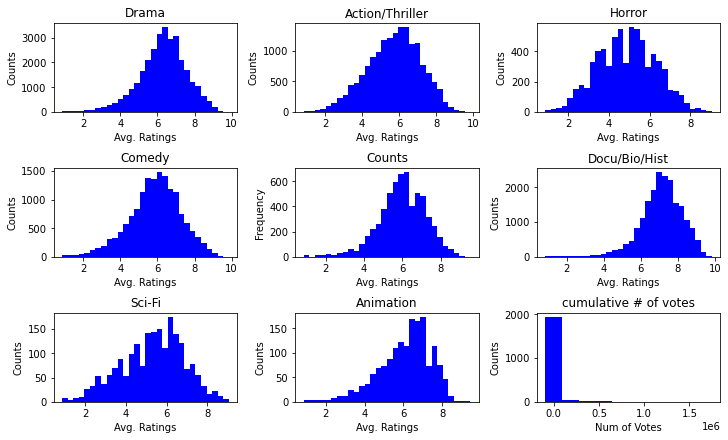

In [38]:
fig, axs = plt.subplots(3, 3, figsize=(10, 6), constrained_layout=True)
axs[0,0].hist(x=df_drama_db['averagerating'], bins=30,align='left', color='blue')
#ax1.hist(x=wins, bins=range(8), align="left", color="green")
#axs[0,0].set_xticks(range(20))
axs[0,0].set_xlabel("Avg. Ratings")
axs[0,0].set_ylabel("Counts")
axs[0,0].set_title("Drama")
axs[0,1].hist(x=df_action_db['averagerating'], bins=30,align='left', color='blue')
axs[0,1].set_xlabel("Avg. Ratings")
axs[0,1].set_ylabel("Counts")
axs[0,1].set_title("Action/Thriller")
axs[0,2].hist(x=df_horror_db['averagerating'], bins=30,align='left', color='blue')
axs[0,2].set_xlabel("Avg. Ratings")
axs[0,2].set_ylabel("Counts")
axs[0,2].set_title("Horror")
axs[1,0].hist(x=df_comedy_db['averagerating'], bins=30,align='left', color='blue')
axs[1,0].set_xlabel("Avg. Ratings")
axs[1,0].set_ylabel("Counts")
axs[1,0].set_title("Comedy")
axs[1,1].hist(x=df_romance_db['averagerating'], bins=30,align='left', color='blue')
axs[1,1].set_xlabel("Avg. Ratings")
axs[1,1].set_ylabel("Frequency")
axs[1,1].set_title("Counts")
axs[1,2].hist(x=df_docu_db['averagerating'], bins=30,align='left', color='blue')
axs[1,2].set_xlabel("Avg. Ratings")
axs[1,2].set_ylabel("Counts")
axs[1,2].set_title("Docu/Bio/Hist")
axs[2,0].hist(x=df_scifi_db['averagerating'], bins=30,align='left', color='blue')
axs[2,0].set_xlabel("Avg. Ratings")
axs[2,0].set_ylabel("Counts")
axs[2,0].set_title("Sci-Fi")
axs[2,1].hist(x=df_anime_db['averagerating'], bins=30,align='left', color='blue')
axs[2,1].set_xlabel("Avg. Ratings")
axs[2,1].set_ylabel("Counts")
axs[2,1].set_title("Animation")
axs[2,2].hist(x=df_scifi_db['numvotes'], align='left', color='blue')
axs[2,2].set_xlabel("Num of Votes")
axs[2,2].set_ylabel("Counts")
axs[2,2].set_title("cumulative # of votes")

#axs[2,2].scatter(df_genres['numvotes'], df_genres['averagerating'], color="green")
#axs[2,2].set_xlabel("Num of votes")
#axs[2,2].set_title("Avg. Ratings");

In [39]:
df_movie_db[df_movie_db['primary_name']=='Mark Lewis']

,movie_id,primary_title,averagerating,numvotes,genres,start_year,primary_name,person_id
4272,tt1568924,Cane Toads: The Conquest,7.0,403,"Comedy,Documentary",2010,Mark Lewis,nm0507503
21640,tt2375232,Wild Girl Waltz,7.5,14,Comedy,2012,Mark Lewis,nm3378947
37186,tt3838154,Invention,6.7,17,None,2015,Mark Lewis,nm0507505


In [40]:
df_list=[df_action_db,df_drama_db,df_horror_db,df_romance_db,df_comedy_db,df_scifi_db,df_docu_db,df_anime_db]
list_genres=['action','drama','horror','romance','comedy','sci-fi','docu','anime']

In [41]:
means_genres_list = get_mean_values(df_list,'averagerating')
stds_genres_list  = get_std_values(df_list,'averagerating')
sum_votes_list    = get_sum_values(df_list,'numvotes')
means_votes_list  = get_mean_values(df_list,'numvotes')
stds_votes_list   = get_std_values(df_list,'numvotes')
stds_votes_list

151658512
121504905
23140666
25822393
70728116
42570948
32057806
15328640


[53160.61,
 28948.46,
 19410.91,
 23255.93,
 29349.09,
 100869.45,
 18978.24,
 46937.48]

In [42]:
df_action_db.describe()

,averagerating,numvotes,start_year
count,16346.000000,1.634600e+04,16346.000000
mean,5.817154,9.278020e+03,2014.355072
std,1.435343,5.316061e+04,2.591928
min,1.000000,5.000000e+00,2010.000000
25%,4.900000,2.500000e+01,2012.000000
50%,5.900000,1.440000e+02,2014.000000
75%,6.800000,9.457500e+02,2017.000000
max,10.000000,1.841066e+06,2019.000000


In [247]:
#stds_genres_list=get_std_values(df_list,'averagerating')
#stds_genres_list

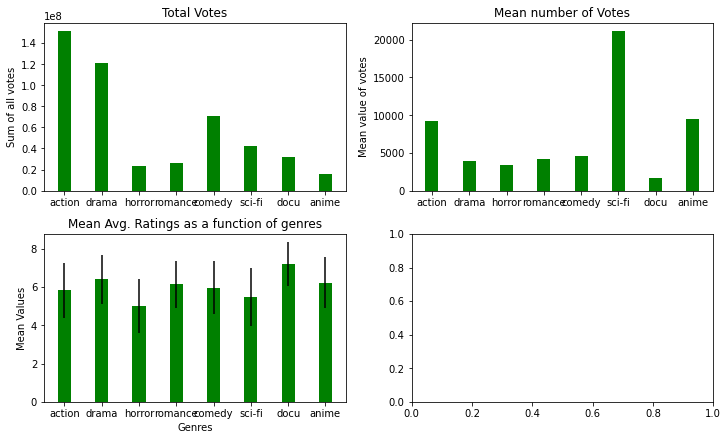

In [43]:
#print("mean # of votes {:0.2f}".format(df_action_db['numvotes'].sum()))
#print("mean # of votes {:0.2f}".format(df_docu_db['numvotes'].sum()))
#print("mean # of votes {:0.2f}".format(df_drama_db['numvotes'].sum()))
#print("mean # of votes {:0.2f}".format(df_scifi_db['numvotes'].sum()))
fig, axs = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)
axs[0,0].bar(list_genres, sum_votes_list,  color='green', width=0.35)
axs[0,1].bar(list_genres, means_votes_list,  color='green', width=0.35,)#yerr=stds_votes_list)
axs[1,0].bar(list_genres, means_genres_list,color ='green',width = 0.35,yerr=stds_genres_list)
#axs[1,1].scatter(means_genres_list,mean_votes_list, color ='green', label=list_genres)
axs[0,0].set_ylabel('Sum of all votes')
axs[0,0].set_title('Total Votes')
#axs[0,0].legend()
axs[0,1].set_ylabel('Mean value of votes')
axs[0,1].set_title('Mean number of Votes')
#axs[0,1].legend()
axs[1,0].set_xlabel("Genres")
axs[1,0].set_ylabel("Mean Values")
axs[1,0].set_title("Mean Avg. Ratings as a function of genres")
#axs[1,1].legend()
plt.show()

I am unsure about if I need to use *movie_akas* which has languaue info and region. I will think about it at the end

Now I will look at the *csv* and *tsv (I converted it into csv file)* files

In [44]:
df_gross_movie = pd.read_csv("zippedData/bom.movie_gross.csv")
df_gross_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [45]:
df_gross_movie.studio.value_counts()

IFC             166
Uni.            147
WB              140
Magn.           136
Fox             136
               ... 
Dreamwest         1
Crimson           1
CineGalaxy        1
MUBI              1
Conglomerate      1
Name: studio, Length: 257, dtype: int64

In [46]:
#df_gross_movie[df_gross_movie['title'].str.contains('Harry')=='True']
df_gross_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [47]:
df_budgets_movie = pd.read_csv("zippedData/tn.movie_budgets.csv")
df_budgets_movie

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [48]:
df_budgets_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [49]:
df_budgets_movie.movie.value_counts()

Home                    3
Halloween               3
King Kong               3
Dangerous Liaisons      2
The Ten Commandments    2
                       ..
Manderlay               1
The Siege               1
The Social Network      1
Modern Problems         1
House Party 2           1
Name: movie, Length: 5698, dtype: int64

In [50]:
df_budgets_movie[df_budgets_movie['movie']=='Halloween']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
3014,15,"Aug 31, 2007",Halloween,"$15,000,000","$58,269,151","$77,514,401"
3535,36,"Oct 19, 2018",Halloween,"$10,000,000","$159,342,015","$254,900,667"
5536,37,"Oct 17, 1978",Halloween,"$325,000","$47,000,000","$70,000,000"


In [60]:
#check for duplicate entries if any
df_budgets_movie[df_budgets_movie.duplicated()==True]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom


In [61]:
df_gross_movie.title.value_counts()

Bluebeard                       2
Kumiko, The Treasure Hunter     1
My Way (2012)                   1
Tiny Times 2                    1
Timbuktu                        1
                               ..
Klown                           1
The Secret World of Arrietty    1
From Prada to Nada              1
Office Christmas Party          1
Wild (2014)                     1
Name: title, Length: 3386, dtype: int64

Looking at the two files, one named gross and other named budget, it seems budgets file supersedes the gross movie file (has more entries and it contains production budget as well as gross income). So instead of merging, I will just use budgets file. The gross file might still contain some movies that do not existin budgets file, but without the production budget info, I cant do much there

The functions below just convert the columns with dollars info into floats so that I can calculate profit

In [62]:
convert_dollars_to_float(df_budgets_movie,'production_budget')
convert_dollars_to_float(df_budgets_movie,'domestic_gross')
convert_dollars_to_float(df_budgets_movie,'worldwide_gross')

AttributeError: Can only use .str accessor with string values!

I will define profit (in absolute dollars) using the worldwide gross income  and also domestic profit

In [63]:
df_budgets_movie['profit']=df_budgets_movie['worldwide_gross']-df_budgets_movie['production_budget']
df_budgets_movie['profit_dom']=df_budgets_movie['domestic_gross']-df_budgets_movie['production_budget']
df_budgets_movie

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,335507625.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,-169536125.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-307237650.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,128405868.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,303181382.0
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,-7000.0
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,2.344950e+05,42482.0
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03,-3662.0
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03,-1400.0


In [64]:
#df_budgets_movie[df_budgets_movie['movie']=='King Kong']
df_budgets_movie.sort_values(by=['profit'], ascending=False).head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,335507625.0
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09,459363944.0
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,378815482.0
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09,630662225.0
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09,437270625.0
66,67,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,1.328723e+09,163007020.0
26,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,1.292936e+09,398279547.0
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,1.216693e+09,256193157.0
41,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,1.148258e+09,500059566.0
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,1.135773e+09,247719760.0


In [58]:
 #dftest.sort_values(by=['popularity'], ascending=False)
#print(df_gross_movie['title'].value_counts(), df_budgets_movie['movie'].value_counts(), df_Movie_comb['title'].value_counts())

### Reading the other csv files, these files have ids for genres, but I do not know where the values for these ids are defined. So pretty mucg genre_id is uselss as of now

In [65]:
df_tmdb_movie = pd.read_csv("zippedData/tmdb.movies.csv",index_col=0)
df_tmdb_movie.head(50)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [66]:
df_tmdb_movie[df_tmdb_movie["original_title"]!=df_tmdb_movie["title"]]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
14,"[27, 80]",41439,en,Saw 3D,20.370,2010-10-28,Saw: The Final Chapter,6.0,1488
49,"[10749, 18]",61979,es,Tres metros sobre el cielo,13.721,2010-12-20,Three Steps Above Heaven,7.5,960
67,"[16, 12, 14, 10751]",42949,en,Arthur 3: la guerre des deux mondes,12.679,2010-08-22,Arthur 3: The War of the Two Worlds,5.6,865
70,"[80, 18, 9648, 10749]",25376,es,El secreto de sus ojos,12.531,2010-04-16,The Secret in Their Eyes,7.9,1141
75,[16],28874,ja,サマーウォーズ,12.275,2010-10-13,Summer Wars,7.5,447
...,...,...,...,...,...,...,...,...,...
26409,"[10749, 18]",551634,zh,你好，之华,0.600,2018-11-09,Last Letter,6.0,1
26422,[14],517676,es,El verano del león eléctrico,0.600,2018-11-12,The Summer of the Electric Lion,6.0,1
26432,"[18, 35]",467746,fr,Contes de Juillet,0.600,2018-03-09,July Tales,6.0,1
26494,[18],567020,es,La última virgen,0.600,2018-05-26,The Last Virgin,2.0,1


In [67]:
#This gives starnge output, I dont see any duplicates
df_tmdb_movie[df_tmdb_movie.duplicated()==True]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
2477,"[16, 35, 10751]",863,en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553
2536,"[12, 28, 878]",20526,en,TRON: Legacy,13.459,2010-12-10,TRON: Legacy,6.3,4387
2673,"[18, 10749]",46705,en,Blue Valentine,8.994,2010-12-29,Blue Valentine,6.9,1677
2717,"[35, 18, 14, 27, 9648]",45649,en,Rubber,8.319,2010-09-01,Rubber,5.9,417
...,...,...,...,...,...,...,...,...,...
26481,"[35, 18]",270805,en,Summer League,0.600,2013-03-18,Summer League,4.0,3
26485,"[27, 53]",453259,en,Devils in the Darkness,0.600,2013-05-15,Devils in the Darkness,3.5,1
26504,"[27, 35, 27]",534282,en,Head,0.600,2015-03-28,Head,1.0,1
26510,[99],495045,en,Fail State,0.600,2018-10-19,Fail State,0.0,1


In [68]:
df_tmdb_movie=df_tmdb_movie[df_tmdb_movie["original_language"]=="en"]

In [69]:
df_tmdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23291 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          23291 non-null  object 
 1   id                 23291 non-null  int64  
 2   original_language  23291 non-null  object 
 3   original_title     23291 non-null  object 
 4   popularity         23291 non-null  float64
 5   release_date       23291 non-null  object 
 6   title              23291 non-null  object 
 7   vote_average       23291 non-null  float64
 8   vote_count         23291 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [70]:
df_tmdb_movie['title'].value_counts()

Eden                            7
Home                            6
Lucky                           5
The Gift                        5
Aftermath                       5
                               ..
Blade Runner: Black Out 2022    1
Scene Box                       1
Einstein's God Model            1
The Nursery                     1
Bare                            1
Name: title, Length: 21771, dtype: int64

In [71]:
df_tmdb_movie[df_tmdb_movie["original_title"]!=df_tmdb_movie["title"]]


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
14,"[27, 80]",41439,en,Saw 3D,20.370,2010-10-28,Saw: The Final Chapter,6.0,1488
67,"[16, 12, 14, 10751]",42949,en,Arthur 3: la guerre des deux mondes,12.679,2010-08-22,Arthur 3: The War of the Two Worlds,5.6,865
191,"[28, 12, 53]",44918,en,Titanic II,8.729,2010-08-24,Titanic 2,3.2,90
568,"[27, 53]",57018,en,Captifs,3.353,2010-10-16,Caged,5.5,47
578,"[10752, 14, 28, 18]",36699,en,My Iz Budushchego 2,3.275,2010-11-11,We Are from the Future 2,5.3,25
...,...,...,...,...,...,...,...,...,...
25791,"[53, 10770]",555185,en,Eve of Abduction,1.480,2018-06-01,My Little Girl Is Gone,5.0,1
25824,[18],416369,en,Migas de pan,1.400,2018-08-14,Breadcrumbs,6.0,2
26252,"[99, 10402]",501350,en,The Doors: Live at the Isle of Wight Festival ...,0.600,2018-02-23,The Doors - Live at the Isle of Wight Festival...,10.0,1
26365,"[27, 35]",536638,en,Holy Pepperoni,0.600,2018-07-19,Deliverynce,7.0,1


In [72]:
df_tmdb_movie[df_tmdb_movie['title']=='Home']

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
9651,[],237303,en,Home,0.840,2013-11-22,Home,7.0,2
14262,"[14, 35, 16, 878, 10751]",228161,en,Home,12.835,2015-03-27,Home,6.8,2372
19580,[],409371,en,Home,0.672,2016-08-01,Home,7.0,1
20446,"[27, 18, 10751]",381507,en,Home,0.600,2016-03-01,Home,4.7,14
20455,[18],388223,en,Home,0.600,2016-03-17,Home,4.5,2
23694,[878],496256,en,Home,0.600,2017-04-30,Home,4.0,1


In [54]:
#df.style.format({"DOB": lambda t: t.strftime("%m/%d/%Y")})
#df_budgets_movie.style.format({"release_date": lambda t: t.strftime("%Y-%m-%d")})
#df_budgets_movie['release_date'] = pd.to_datetime(df_budgets_movie['release_date'])

Changing the release_date column to datetime object and a format that I plan to use for tmdb data table as well so that I can merge on them

In [73]:
df_budgets_movie['release_date'] = pd.to_datetime(df_budgets_movie['release_date'])
df_budgets_movie.style.format({"release_date": lambda t: t.strftime("%Y-%m-%d")})
df_budgets_movie

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,335507625.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,-169536125.0
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-307237650.0
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,128405868.0
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,303181382.0
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,-7000.0
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,2.344950e+05,42482.0
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03,-3662.0
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03,-1400.0


In [74]:
df_tmdb_movie['release_date'] = pd.to_datetime(df_tmdb_movie['release_date'])
df_tmdb_movie.style.format({"release_date": lambda t: t.strftime("%Y-%m-%d")})
df_tmdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23291 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          23291 non-null  object        
 1   id                 23291 non-null  int64         
 2   original_language  23291 non-null  object        
 3   original_title     23291 non-null  object        
 4   popularity         23291 non-null  float64       
 5   release_date       23291 non-null  datetime64[ns]
 6   title              23291 non-null  object        
 7   vote_average       23291 non-null  float64       
 8   vote_count         23291 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 2.4+ MB


#### Lets merge budgets information with popularity and vote info from tmdb file

In [75]:
df_budg_tmdb=pd.merge(df_budgets_movie,df_tmdb_movie,how='inner',left_on='movie', right_on='title')
df_budg_tmdb

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,335507625.0,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,-169536125.0,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571
2,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,128405868.0,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,378815482.0,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,-70975705.0,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,49,2015-09-01,Exeter,25000.0,0.0,4.897920e+05,4.647920e+05,-25000.0,"[53, 27]",226458,en,Exeter,5.934,2015-03-26,Exeter,4.7,121
2251,51,2015-04-21,Ten,25000.0,0.0,0.000000e+00,-2.500000e+04,-25000.0,"[12, 27, 9648, 53]",279516,en,Ten,1.575,2014-03-28,Ten,5.4,5
2252,54,2014-12-31,Dry Spell,22000.0,0.0,0.000000e+00,-2.200000e+04,-22000.0,"[35, 10749]",255266,en,Dry Spell,0.600,2013-02-14,Dry Spell,6.0,1
2253,56,2013-01-04,All Superheroes Must Die,20000.0,0.0,0.000000e+00,-2.000000e+04,-20000.0,"[878, 53]",86304,en,All Superheroes Must Die,2.078,2013-01-04,All Superheroes Must Die,3.9,19


In [78]:
df_budg_tmdb[df_budg_tmdb.duplicated()==True]
df_budg_tmdb[df_budg_tmdb['title']=='Justice League']

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
4,9,2017-11-17,Justice League,300000000.0,229024295.0,655945209.0,355945209.0,-70975705.0,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510
5,9,2017-11-17,Justice League,300000000.0,229024295.0,655945209.0,355945209.0,-70975705.0,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510


In [86]:
dftest2=df_budg_tmdb[df_budg_tmdb['release_date_x']==df_budg_tmdb['release_date_y']]
dftest2

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,335507625.0,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,-169536125.0,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571
2,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,128405868.0,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,378815482.0,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,-70975705.0,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,20,2015-07-31,Counting,50000.0,8374.0,8.374000e+03,-4.162600e+04,-41626.0,[99],322745,en,Counting,0.600,2015-07-31,Counting,8.3,3
2235,22,2014-02-14,Down and Dangerous,50000.0,0.0,0.000000e+00,-5.000000e+04,-50000.0,"[80, 53, 18]",164286,en,Down and Dangerous,2.621,2014-02-14,Down and Dangerous,4.3,9
2237,25,2015-09-01,"Run, Hide, Die",50000.0,0.0,0.000000e+00,-5.000000e+04,-50000.0,"[53, 27]",290391,en,"Run, Hide, Die",0.600,2015-09-01,"Run, Hide, Die",3.5,2
2247,38,2016-03-18,Krisha,30000.0,144822.0,1.448220e+05,1.148220e+05,114822.0,[18],323929,en,Krisha,5.288,2016-03-18,Krisha,6.8,86


In [285]:
df_budg_tmdb.shape

(2255, 17)

In [87]:
dftest2.shape

(1244, 17)

In [88]:
dftest2[dftest2['title']=='Justice League']

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
4,9,2017-11-17,Justice League,300000000.0,229024295.0,655945209.0,355945209.0,-70975705.0,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510


In [89]:
df_budg_tmdb = df_budg_tmdb.drop_duplicates()
dftest2      = dftest2.drop_duplicates()

In [90]:
print(df_budg_tmdb.shape,dftest2.shape)

(2087, 17) (1244, 17)


In [91]:
dftest2['movie'].value_counts()

Robin Hood                2
Legend                    2
Lean on Pete              1
Jigsaw                    1
Think Like a Man          1
                         ..
Apollo 18                 1
Office Christmas Party    1
Thor                      1
Max                       1
A Quiet Place             1
Name: movie, Length: 1242, dtype: int64

In [92]:
dftest2=dftest2[dftest2['original_language']=='en']
dftest2['movie'].value_counts()

Robin Hood                2
Legend                    2
Lean on Pete              1
Jigsaw                    1
Think Like a Man          1
                         ..
Apollo 18                 1
Office Christmas Party    1
Thor                      1
Max                       1
A Quiet Place             1
Name: movie, Length: 1242, dtype: int64

In [93]:
#dftest2=dftest2.drop_duplicates(subset='release_date_y', keep="first & last")
#dftest2=dftest2.drop_duplicates()
#dftest2[dftest2['title']=='Robin Hood']
dftest2

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,335507625.0,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,-169536125.0,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571
2,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,128405868.0,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,378815482.0,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,-70975705.0,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,20,2015-07-31,Counting,50000.0,8374.0,8.374000e+03,-4.162600e+04,-41626.0,[99],322745,en,Counting,0.600,2015-07-31,Counting,8.3,3
2235,22,2014-02-14,Down and Dangerous,50000.0,0.0,0.000000e+00,-5.000000e+04,-50000.0,"[80, 53, 18]",164286,en,Down and Dangerous,2.621,2014-02-14,Down and Dangerous,4.3,9
2237,25,2015-09-01,"Run, Hide, Die",50000.0,0.0,0.000000e+00,-5.000000e+04,-50000.0,"[53, 27]",290391,en,"Run, Hide, Die",0.600,2015-09-01,"Run, Hide, Die",3.5,2
2247,38,2016-03-18,Krisha,30000.0,144822.0,1.448220e+05,1.148220e+05,114822.0,[18],323929,en,Krisha,5.288,2016-03-18,Krisha,6.8,86


Create a small dataframe with only a few columns that I want to use

In [94]:
dftest2[dftest2['title']=='Justice League']

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
4,9,2017-11-17,Justice League,300000000.0,229024295.0,655945209.0,355945209.0,-70975705.0,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510


In [95]:
df_profit_pop =dftest2[['movie','profit','profit_dom','popularity','vote_average']].copy()


In [96]:
#dftest_new.sort_values(by=['profit','popularity','vote_average'], ascending=False,inplace=True)
df_profit_pop.sort_values(by=['profit'], ascending=False,inplace=True)
df_profit_pop =df_profit_pop.reset_index()
df_small=df_profit_pop.loc[0:20]
df_small

,index,movie,profit,profit_dom,popularity,vote_average
0,0,Avatar,2.351345e+09,335507625.0,26.526,7.4
1,3,Avengers: Infinity War,1.748134e+09,378815482.0,80.773,8.3
2,26,Jurassic World,1.433855e+09,437270625.0,20.709,6.6
3,59,Furious 7,1.328723e+09,163007020.0,20.396,7.3
4,20,The Avengers,1.292936e+09,398279547.0,50.289,7.6
5,36,Black Panther,1.148258e+09,500059566.0,44.140,7.4
6,96,Jurassic World: Fallen Kingdom,1.135773e+09,247719760.0,34.958,6.5
7,115,Beauty and the Beast,1.099200e+09,344014165.0,31.793,6.9
8,402,Minions,1.086336e+09,262045770.0,9.338,6.4
9,2,Avengers: Age of Ultron,1.072414e+09,128405868.0,44.383,7.3


 I am normalizing each column by its mean value so that I can plot popularity, profit and vote average on same plot. This may not be very kosher but I think its okay for this study.

In [97]:
df_small['profit']      =df_small['profit']/df_small['profit'].mean()
df_small['profit_dom']  =df_small['profit_dom']/df_small['profit_dom'].mean()
df_small['popularity']  =df_small['popularity']/df_small['popularity'].mean()
df_small['vote_average'] =df_small['vote_average']/df_small['vote_average'].mean()

<ipython-input-97-ca237730ed85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['profit']      =df_small['profit']/df_small['profit'].mean()
<ipython-input-97-ca237730ed85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['profit_dom']  =df_small['profit_dom']/df_small['profit_dom'].mean()
<ipython-input-97-ca237730ed85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

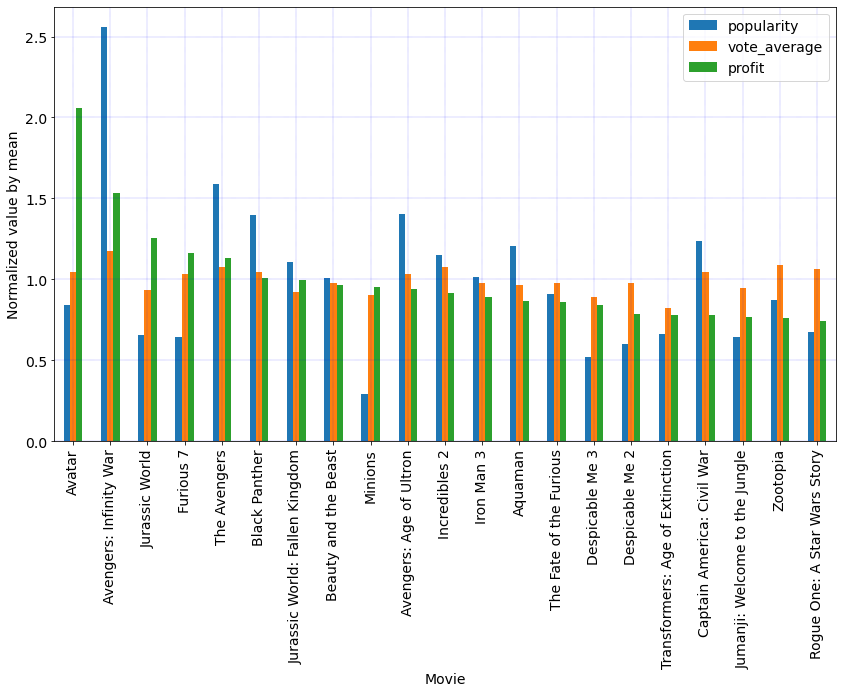

In [133]:
#ax1 = plt.figure(figsize=(30, 16))
plt.rcParams.update({'font.size': 14})

ax1 = df_small.plot(x="movie", y=["popularity", "vote_average", "profit"], figsize=(14,8),kind="bar")
ax1.set_ylabel('Normalized value by mean')
ax1.set_xlabel('Movie')
ax1.grid(linestyle='--', linewidth='0.2', color='blue')

In [296]:
#df_small.plot(x="movie", y=["popularity", "vote_average","profit"], kind="bar", figsize=(9, 8))

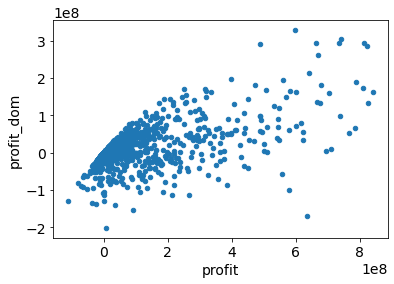

In [134]:
#dftest=dftest.drop_duplicates(subset='release_date_x', keep="first")
ax2 = df_profit_pop.plot.scatter(x='profit',
                    y='profit_dom',
                    colormap='viridis')

In [135]:
df_rt_reviews_movie = pd.read_csv("zippedData/rt.reviews.csv")
df_rt_reviews_movie#['review'][0]

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [136]:
df_rt_info_movie = pd.read_csv("zippedData/rt.movie_info.tsv",sep='\t')
df_rt_info_movie 

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [137]:
df_rt_info_movie['genre'].value_counts().head(20)

Drama                                               151
Comedy                                              110
Comedy|Drama                                         80
Drama|Mystery and Suspense                           67
Art House and International|Drama                    62
Action and Adventure|Drama                           42
Action and Adventure|Drama|Mystery and Suspense      40
Drama|Romance                                        35
Comedy|Romance                                       32
Horror                                               31
Art House and International|Comedy|Drama             31
Action and Adventure|Science Fiction and Fantasy     24
Comedy|Drama|Romance                                 23
Classics|Drama                                       21
Action and Adventure|Mystery and Suspense            20
Action and Adventure                                 19
Classics|Drama|Mystery and Suspense                  18
Horror|Mystery and Suspense                     

In [138]:
df_rt_info_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [139]:
df_rt_info_movie.dropna(subset=['director','genre'],inplace=True)
df_rt_info_movie['theater_date'] = pd.to_datetime(df_rt_info_movie['theater_date'])
df_rt_info_movie.style.format({"theater_date": lambda t: t.strftime("%Y-%m-%d")})
df_rt_info_movie

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,"Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,"Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,"Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1993,A former child actor turned talent agent is hi...,PG,Comedy,James Lapine,NaN,1993-06-04,"Apr 8, 2003",NaN,NaN,95 minutes,NaN
1554,1995,"Special government agent James West, long on c...",PG-13,Action and Adventure|Comedy|Western,Barry Sonnenfeld,NaN,1999-06-30,"Nov 30, 1999",NaN,NaN,107 minutes,Warner Bros. Pictures
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23,"Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,1962-01-01,"May 11, 2004",NaN,NaN,111 minutes,NaN


In [303]:
#df_rt_info_movie[df_rt_info_movie['director']=='Woody Allen']

In [140]:
df_rt_info_movie.director.value_counts()

Steven Spielberg                                        10
Clint Eastwood                                           8
Bruce Beresford                                          4
Jim Jarmusch                                             4
William Beaudine                                         4
                                                        ..
Javier Olivera                                           1
Marcel Camus                                             1
Willem van de Sande Bakhuyzen                            1
Jesse Dylan                                              1
Hironobu Sakaguchi|Motonori Sakakibara|Jack Fletcher     1
Name: director, Length: 1124, dtype: int64

In [141]:
df_rt_info_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1360 entries, 0 to 1558
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1360 non-null   int64         
 1   synopsis      1321 non-null   object        
 2   rating        1360 non-null   object        
 3   genre         1360 non-null   object        
 4   director      1360 non-null   object        
 5   writer        1042 non-null   object        
 6   theater_date  1083 non-null   datetime64[ns]
 7   dvd_date      1083 non-null   object        
 8   currency      299 non-null    object        
 9   box_office    299 non-null    object        
 10  runtime       1344 non-null   object        
 11  studio        440 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 178.1+ KB


In [311]:
#df_rt_info_movie.groupby('genres')
df_genres=df_rt_info_movie.groupby(['genre']).sum()
df_genres

,id
genre,
Action and Adventure,10613
Action and Adventure|Animation|Art House and International|Drama|Science Fiction and Fantasy,135
Action and Adventure|Animation|Classics|Comedy|Kids and Family|Musical and Performing Arts,1156
Action and Adventure|Animation|Comedy|Drama|Kids and Family,1418
Action and Adventure|Animation|Comedy|Drama|Kids and Family|Musical and Performing Arts,1154
...,...
Mystery and Suspense|Science Fiction and Fantasy,3076
Science Fiction and Fantasy,6950
Science Fiction and Fantasy|Romance,1908


In [312]:
df_rt_info_movie[df_rt_info_movie['id']==3]

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [84]:
df_rt_reviews_movie[df_rt_reviews_movie['id']==3]

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
158,3,Beyond its withering critique of contemporary ...,NaN,fresh,David Jenkins,0,Little White Lies,"May 25, 2012"
159,3,"Threatens to soar and to be important, but it ...",3/5,fresh,Dave Calhoun,1,Time Out,"May 25, 2012"
160,3,A parade of hollow didactic encounters.,NaN,rotten,Owen Gleiberman,1,Entertainment Weekly,"May 25, 2012"
161,3,[An] agonisingly self-conscious and meagre pie...,2/5,rotten,Peter Bradshaw,0,Guardian,"May 25, 2012"


### <span style="color:red"> I am not yet sure what to do with these two tables. I can probably use the "df_rt_info_movie" table and study different genres and may be directors. </span>

In [142]:
df_sql_budgets_db =pd.merge(df_budgets_movie,df_movie_db,how='inner',left_on='movie', right_on='primary_title')
df_sql_budgets_db

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,movie_id,primary_title,averagerating,numvotes,genres,start_year,primary_name,person_id
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,335507625.0,tt1775309,Avatar,6.1,43,Horror,2011,Atsushi Wada,nm3786927
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,-169536125.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,6.6,447624,"Action,Adventure,Fantasy",2011,Rob Marshall,nm0551128
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-307237650.0,tt6565702,Dark Phoenix,6.0,24451,"Action,Adventure,Sci-Fi",2019,Simon Kinberg,nm1334526
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,128405868.0,tt2395427,Avengers: Age of Ultron,7.3,665594,"Action,Adventure,Sci-Fi",2015,Joss Whedon,nm0923736
4,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,378815482.0,tt4154756,Avengers: Infinity War,8.5,670926,"Action,Adventure,Sci-Fi",2018,"Anthony Russo, Joe Russo","nm0751577, nm0751648"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2721,59,2011-11-25,The Ridges,17300.0,0.0,0.000000e+00,-1.730000e+04,-17300.0,tt1781935,The Ridges,2.9,127,"Drama,Horror,Thriller",2011,Brandon Landers,nm4192760
2722,62,2014-12-31,Stories of Our Lives,15000.0,0.0,0.000000e+00,-1.500000e+04,-15000.0,tt3973612,Stories of Our Lives,7.5,85,Drama,2014,Jim Chuchu,nm5874888
2723,68,2001-07-06,Cure,10000.0,94596.0,9.459600e+04,8.459600e+04,84596.0,tt1872026,Cure,4.9,11,Drama,2011,Bill Yip,nm0948107
2724,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,-7000.0,tt7837402,Red 11,5.6,43,"Horror,Sci-Fi,Thriller",2019,Robert Rodriguez,nm0001675


In [143]:
df_sql_budgets_db["start_year"] = df_sql_budgets_db["start_year"].astype(float)

In [144]:
df_sql_budgets_db["year"]=pd.DatetimeIndex(df_sql_budgets_db['release_date']).year.astype(float)

In [145]:
df_sql_budgets_db=df_sql_budgets_db[df_sql_budgets_db['year']==df_sql_budgets_db['start_year']]

In [148]:
df_sql_budgets_db[df_sql_budgets_db.duplicated()==True]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,movie_id,primary_title,averagerating,numvotes,genres,start_year,primary_name,person_id,year


In [149]:
df_sql_budgets_db

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,movie_id,primary_title,averagerating,numvotes,genres,start_year,primary_name,person_id,year
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,-169536125.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,6.6,447624,"Action,Adventure,Fantasy",2011.0,Rob Marshall,nm0551128,2011.0
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-307237650.0,tt6565702,Dark Phoenix,6.0,24451,"Action,Adventure,Sci-Fi",2019.0,Simon Kinberg,nm1334526,2019.0
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,128405868.0,tt2395427,Avengers: Age of Ultron,7.3,665594,"Action,Adventure,Sci-Fi",2015.0,Joss Whedon,nm0923736,2015.0
4,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,378815482.0,tt4154756,Avengers: Infinity War,8.5,670926,"Action,Adventure,Sci-Fi",2018.0,"Anthony Russo, Joe Russo","nm0751577, nm0751648",2018.0
5,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,-70975705.0,tt0974015,Justice League,6.5,329135,"Action,Adventure,Fantasy",2017.0,Zack Snyder,nm0811583,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,45,2017-01-27,Emily,27000.0,3547.0,3.547000e+03,-2.345300e+04,-23453.0,tt4393036,Emily,6.8,13,Drama,2017.0,Ryan Graves,nm6254824,2017.0
2714,49,2015-09-01,Exeter,25000.0,0.0,4.897920e+05,4.647920e+05,-25000.0,tt1945044,Exeter,4.5,5156,"Horror,Mystery,Thriller",2015.0,Marcus Nispel,nm1197971,2015.0
2719,52,2015-12-01,Dutch Kills,25000.0,0.0,0.000000e+00,-2.500000e+04,-25000.0,tt2759066,Dutch Kills,5.1,82,"Crime,Drama,Thriller",2015.0,Joseph Mazzella,nm3556672,2015.0
2721,59,2011-11-25,The Ridges,17300.0,0.0,0.000000e+00,-1.730000e+04,-17300.0,tt1781935,The Ridges,2.9,127,"Drama,Horror,Thriller",2011.0,Brandon Landers,nm4192760,2011.0


In [158]:
df_sql_budgets_db[df_sql_budgets_db['primary_name'].str.contains('Russo')]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,movie_id,primary_title,averagerating,numvotes,genres,start_year,primary_name,person_id,year
4,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,378815482.0,tt4154756,Avengers: Infinity War,8.5,670926,"Action,Adventure,Sci-Fi",2018.0,"Anthony Russo, Joe Russo","nm0751577, nm0751648",2018.0
12,17,2016-05-06,Captain America: Civil War,250000000.0,408084349.0,1.140069e+09,8.900694e+08,158084349.0,tt3498820,Captain America: Civil War,7.8,583507,"Action,Adventure,Sci-Fi",2016.0,"Anthony Russo, Joe Russo","nm0751577, nm0751648",2016.0
98,16,2014-04-04,Captain America: The Winter Soldier,170000000.0,259746958.0,7.144019e+08,5.444019e+08,89746958.0,tt1843866,Captain America: The Winter Soldier,7.8,666252,"Action,Adventure,Sci-Fi",2014.0,"Anthony Russo, Joe Russo","nm0751577, nm0751648",2014.0
2054,12,2017-03-03,Before I Fall,5000000.0,12241072.0,1.894568e+07,1.394568e+07,7241072.0,tt1691916,Before I Fall,6.4,39282,"Drama,Fantasy,Mystery",2017.0,Ry Russo-Young,nm1735543,2017.0


In [162]:
df_sql_budgets_db[df_sql_budgets_db['primary_name'].str.contains('James Wan')]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,movie_id,primary_title,averagerating,numvotes,genres,start_year,primary_name,person_id,year
56,67,2015-04-03,Furious 7,190000000.0,353007020.0,1.518723e+09,1.328723e+09,163007020.0,tt2820852,Furious 7,7.2,335074,"Action,Crime,Thriller",2015.0,James Wan,nm1490123,2015.0
118,36,2018-12-21,Aquaman,160000000.0,335061807.0,1.146895e+09,9.868946e+08,175061807.0,tt1477834,Aquaman,7.1,263328,"Action,Adventure,Fantasy",2018.0,James Wan,nm1490123,2018.0
1230,93,2013-07-19,The Conjuring,20000000.0,137400141.0,3.180001e+08,2.980001e+08,117400141.0,tt1457767,The Conjuring,7.5,397233,"Horror,Mystery,Thriller",2013.0,James Wan,nm1490123,2013.0


In [163]:
(df_sql_budgets_db.groupby(['primary_name']).sum()).sort_values(by='profit',ascending=False).head(20)

,id,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,averagerating,numvotes,start_year,year
primary_name,,,,,,,,,,
"Anthony Russo, Joe Russo",40,720000000.0,1.346647e+09,3.902606e+09,3.182606e+09,626646789.0,24.1,1920685,6048.0,6048.0
James Wan,196,370000000.0,8.254690e+08,2.983618e+09,2.613618e+09,455468968.0,21.8,995635,6046.0,6046.0
Joss Whedon,31,555600000.0,1.082285e+09,2.920950e+09,2.365350e+09,526685415.0,15.4,1849249,4027.0,4027.0
Christopher Nolan,150,750000000.0,1.118801e+09,3.086180e+09,2.336180e+09,368801468.0,33.7,4994749,8053.0,8053.0
Michael Bay,167,648000000.0,7.778736e+08,2.911998e+09,2.263998e+09,129873593.0,23.5,956722,8055.0,8055.0
Peter Jackson,62,750000000.0,8.164902e+08,2.922948e+09,2.172948e+09,66490211.0,23.1,1723813,6039.0,6039.0
Francis Lawrence,254,522000000.0,1.149112e+09,2.543192e+09,2.021192e+09,627112056.0,34.2,1449439,10071.0,10071.0
Bryan Singer,298,628000000.0,6.708550e+08,2.383073e+09,1.755073e+09,42854965.0,29.3,1445228,8061.0,8061.0
Sam Mendes,62,500000000.0,5.044345e+08,1.990148e+09,1.490148e+09,4434452.0,14.6,944725,4027.0,4027.0


In [164]:
df_sql_budgets_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 1 to 2722
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1445 non-null   int64         
 1   release_date       1445 non-null   datetime64[ns]
 2   movie              1445 non-null   object        
 3   production_budget  1445 non-null   float64       
 4   domestic_gross     1445 non-null   float64       
 5   worldwide_gross    1445 non-null   float64       
 6   profit             1445 non-null   float64       
 7   profit_dom         1445 non-null   float64       
 8   movie_id           1445 non-null   object        
 9   primary_title      1445 non-null   object        
 10  averagerating      1445 non-null   float64       
 11  numvotes           1445 non-null   int64         
 12  genres             1444 non-null   object        
 13  start_year         1445 non-null   float64       
 14  primary_

In [168]:
df_sql_budgets_db.primary_name.value_counts().head(20)

Steven Spielberg      7
Jon M. Chu            6
Ridley Scott          6
Clint Eastwood        6
Antoine Fuqua         5
Zack Snyder           5
Jaume Collet-Serra    5
David O. Russell      5
Francis Lawrence      5
Denis Villeneuve      5
Jonathan Levine       5
Brad Peyton           5
Ron Howard            5
Steven Soderbergh     5
Tim Burton            5
David Ayer            5
Peter Berg            5
Simon West            4
Kevin Smith           4
Robert Zemeckis       4
Name: primary_name, dtype: int64

In [320]:
df_sql_budgets_db.primary_name.value_counts()

Steven Spielberg    7
Clint Eastwood      6
Jon M. Chu          6
Ridley Scott        6
Brad Peyton         5
                   ..
Brian Klugman       1
Duane Journey       1
Farren Blackburn    1
David Cronenberg    1
David Twohy         1
Name: primary_name, Length: 985, dtype: int64

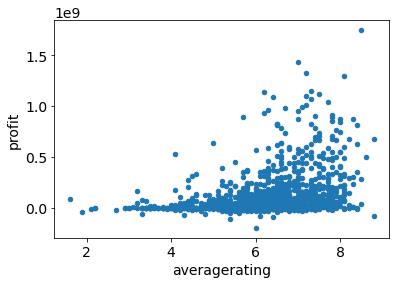

In [169]:
ax2 = df_sql_budgets_db.plot.scatter(x='averagerating',
                    y='profit',
                    colormap='viridis')

In [173]:
df_sql_budtmdb_db =pd.merge(df_budg_tmdb,df_movie_db,how='inner',left_on='movie', right_on='primary_title')
df_sql_budtmdb_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2754 entries, 0 to 2753
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_x               2754 non-null   int64         
 1   release_date_x     2754 non-null   datetime64[ns]
 2   movie              2754 non-null   object        
 3   production_budget  2754 non-null   float64       
 4   domestic_gross     2754 non-null   float64       
 5   worldwide_gross    2754 non-null   float64       
 6   profit             2754 non-null   float64       
 7   profit_dom         2754 non-null   float64       
 8   genre_ids          2754 non-null   object        
 9   id_y               2754 non-null   int64         
 10  original_language  2754 non-null   object        
 11  original_title     2754 non-null   object        
 12  popularity         2754 non-null   float64       
 13  release_date_y     2754 non-null   datetime64[ns]
 14  title   

In [174]:
#ax2 = df_sql_budtmdb_db.plot.scatter(x='runtime_minutes',
#                    y='profit',
#                    colormap='viridis')

In [175]:
df_sql_rt_db =pd.merge(df_sql_budtmdb_db, df_rt_info_movie,how='inner',right_on='theater_date', left_on='release_date_x')
df_budg_rt_db =pd.merge(df_budgets_movie, df_rt_info_movie,how='inner',right_on='theater_date', left_on='release_date')
df_sql_rt_db

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,genre_ids,id_y,...,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,14,2012-03-09,John Carter,275000000.0,73058679.0,282778100.0,7778100.0,-201941321.0,"[28, 12, 878]",49529,...,R,Comedy|Drama,Jennifer Westfeldt,Jennifer Westfeldt,2012-03-09,"Jul 17, 2012",$,"5,600,000",107 minutes,Roadside Attractions
1,14,2012-03-09,John Carter,275000000.0,73058679.0,282778100.0,7778100.0,-201941321.0,"[28, 12, 878]",49529,...,PG-13,Action and Adventure|Horror|Kids and Family|Sc...,Andrew Stanton|Mark Atkins,Mark Atkins|Mark Andrews|Michael Chabon|Andrew...,2012-03-09,"Jun 5, 2012",$,"73,058,679",118 minutes,Walt Disney Pictures
2,1,2012-03-09,A Thousand Words,40000000.0,18450127.0,20790486.0,-19209514.0,-21549873.0,"[18, 35]",72358,...,R,Comedy|Drama,Jennifer Westfeldt,Jennifer Westfeldt,2012-03-09,"Jul 17, 2012",$,"5,600,000",107 minutes,Roadside Attractions
3,1,2012-03-09,A Thousand Words,40000000.0,18450127.0,20790486.0,-19209514.0,-21549873.0,"[18, 35]",72358,...,PG-13,Action and Adventure|Horror|Kids and Family|Sc...,Andrew Stanton|Mark Atkins,Mark Atkins|Mark Andrews|Michael Chabon|Andrew...,2012-03-09,"Jun 5, 2012",$,"73,058,679",118 minutes,Walt Disney Pictures
4,97,2012-03-09,Silent House,2000000.0,12739737.0,16610760.0,14610760.0,10739737.0,"[27, 9648]",92182,...,R,Comedy|Drama,Jennifer Westfeldt,Jennifer Westfeldt,2012-03-09,"Jul 17, 2012",$,"5,600,000",107 minutes,Roadside Attractions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,65,2003-09-12,Cabin Fever,1500000.0,21158188.0,30351664.0,28851664.0,19658188.0,[27],298584,...,PG-13,Comedy|Drama,Ridley Scott,Nicholas Griffin|Ted Griffin,2003-09-12,"Jun 1, 2004",$,"36,873,198",116 minutes,Warner Bros. Pictures
777,17,2001-07-27,Jackpot,400000.0,44452.0,44452.0,-355548.0,-355548.0,[35],241151,...,NR,Comedy|Drama|Romance,Jae-young Kwak,Jae-young Kwak|Ho-sik Kim,2001-07-27,"Feb 19, 2013",NaN,NaN,123 minutes,NaN
778,17,2001-07-27,Jackpot,400000.0,44452.0,44452.0,-355548.0,-355548.0,[35],241151,...,NR,Comedy|Drama|Romance,Jae-young Kwak,Jae-young Kwak|Ho-sik Kim,2001-07-27,"Feb 19, 2013",NaN,NaN,123 minutes,NaN
779,17,2001-07-27,Jackpot,400000.0,44452.0,44452.0,-355548.0,-355548.0,[35],241151,...,NR,Comedy|Drama|Romance,Jae-young Kwak,Jae-young Kwak|Ho-sik Kim,2001-07-27,"Feb 19, 2013",NaN,NaN,123 minutes,NaN


In [176]:
df_budg_rt_db

,id_x,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,id_y,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09,630662225.0,1383,"Through a series of misunderstandings, Alvin, ...",PG,Animation|Comedy|Kids and Family,Walt Becker,NaN,2015-12-18,"Mar 15, 2016",$,"66,580,191",86 minutes,20th Century Fox
1,56,2015-12-18,Alvin and the Chipmunks: The Road Chip,90000000.0,85886987.0,2.495180e+08,1.595180e+08,-4113013.0,1383,"Through a series of misunderstandings, Alvin, ...",PG,Animation|Comedy|Kids and Family,Walt Becker,NaN,2015-12-18,"Mar 15, 2016",$,"66,580,191",86 minutes,20th Century Fox
2,57,2015-12-18,Sisters,30000000.0,87044645.0,1.060307e+08,7.603066e+07,57044645.0,1383,"Through a series of misunderstandings, Alvin, ...",PG,Animation|Comedy|Kids and Family,Walt Becker,NaN,2015-12-18,"Mar 15, 2016",$,"66,580,191",86 minutes,20th Century Fox
3,45,2015-12-18,Saul fia,1700000.0,1777043.0,9.696537e+06,7.996537e+06,77043.0,1383,"Through a series of misunderstandings, Alvin, ...",PG,Animation|Comedy|Kids and Family,Walt Becker,NaN,2015-12-18,"Mar 15, 2016",$,"66,580,191",86 minutes,20th Century Fox
4,14,2012-03-09,John Carter,275000000.0,73058679.0,2.827781e+08,7.778100e+06,-201941321.0,304,Friends with Kids is a daring and poignant ens...,R,Comedy|Drama,Jennifer Westfeldt,Jennifer Westfeldt,2012-03-09,"Jul 17, 2012",$,"5,600,000",107 minutes,Roadside Attractions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,15,1983-01-01,E tu vivrai nel terrore - L'aldilÃ,400000.0,126387.0,1.263870e+05,-2.736130e+05,-273613.0,974,Based on the autobiographical novel by Farley ...,PG,Action and Adventure|Drama,Carroll Ballard,Richard Kletter|Curtis Hanson|Sam Hamm,1983-01-01,"Feb 22, 2000",NaN,NaN,105 minutes,NaN
1828,15,1983-01-01,E tu vivrai nel terrore - L'aldilÃ,400000.0,126387.0,1.263870e+05,-2.736130e+05,-273613.0,1735,NaN,NR,Art House and International|Drama,Alain Tanner,Alain Tanner,1983-01-01,"Jul 15, 1992",NaN,NaN,108 minutes,NaN
1829,15,1983-01-01,E tu vivrai nel terrore - L'aldilÃ,400000.0,126387.0,1.263870e+05,-2.736130e+05,-273613.0,1861,For those with a taste for the repugnant comes...,R,Art House and International|Horror|Science Fic...,Harry Bromley Davenport,Harry Bromley Davenport,1983-01-01,"Sep 20, 2005",NaN,NaN,80 minutes,NaN
1830,69,1981-05-01,Graduation Day,250000.0,23894000.0,2.389400e+07,2.364400e+07,23644000.0,1870,Two months after the events of the original Fr...,R,Horror,Steve Miner,Ron Kurz|Ron Kurtz,1981-05-01,"May 23, 2006",NaN,NaN,87 minutes,NaN


In [177]:
df_budg_rt_db[df_budg_rt_db.duplicated()==True]

,id_x,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,id_y,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio


In [178]:
df_budg_rt_db.id_x.value_counts()

67    29
57    27
71    27
29    27
12    26
      ..
72    11
50    11
61    10
41     9
44     9
Name: id_x, Length: 100, dtype: int64

In [181]:
df_budgets_movie[df_budgets_movie['id']==44]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom
43,44,2018-06-15,Incredibles 2,200000000.0,608581744.0,1.242521e+09,1.042521e+09,408581744.0
143,44,2010-07-14,The Sorcerer's Apprentice,160000000.0,63150991.0,2.179863e+08,5.798632e+07,-96849009.0
243,44,2015-03-27,Home,130000000.0,177397510.0,3.859979e+08,2.559979e+08,47397510.0
343,44,2003-11-21,The Cat in the Hat,109000000.0,101018283.0,1.338183e+08,2.481828e+07,-7981717.0
443,44,2018-12-14,Spider-Man: Into The Spider-Verse 3D,90000000.0,190173195.0,3.753818e+08,2.853818e+08,100173195.0
543,44,1999-05-07,The Mummy,80000000.0,155385488.0,4.163855e+08,3.363855e+08,75385488.0
643,44,1999-07-23,Inspector Gadget,75000000.0,97387965.0,9.738796e+07,2.238796e+07,22387965.0
743,44,2002-09-20,Ballistic: Ecks vs. Sever,70000000.0,14294842.0,1.429484e+07,-5.570516e+07,-55705158.0
843,44,2014-02-07,The Lego Movie,60000000.0,257784718.0,4.577294e+08,3.977294e+08,197784718.0
943,44,1998-10-09,Holy Man,60000000.0,12069719.0,1.206972e+07,-4.793028e+07,-47930281.0


In [180]:
df_budg_rt_db[df_budg_rt_db['id_x']==44]

,id_x,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,id_y,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
438,44,2007-11-21,Hitman,24000000.0,39687694.0,99135571.0,75135571.0,15687694.0,65,A classic Disney fairytale collides with moder...,PG,Comedy|Kids and Family|Romance,Kevin Lima,NaN,2007-11-21,"Mar 18, 2008",$,"127,706,877",108 minutes,Walt Disney Pictures
439,44,2007-11-21,Hitman,24000000.0,39687694.0,99135571.0,75135571.0,15687694.0,1777,When a Vietnam veteran discovers two million d...,R,Action and Adventure|Drama|Mystery and Suspense,Joel Coen|Ethan Coen,Ethan Coen|Joel Coen,2007-11-21,"Apr 7, 2009",$,"74,223,625",122 minutes,Miramax Films
725,44,2012-03-02,Tim and Eric's Billion Dollar Movie,3000000.0,201436.0,223652.0,-2776348.0,-2798564.0,285,An all new feature film from the twisted minds...,R,Comedy,Tim Heidecker|Eric Wareheim,Doug Lussenhop|Tim Heidecker|Jonathan Krisel|E...,2012-03-02,"May 8, 2012",$,"145,778",94 minutes,Magnolia Pictures
736,44,2014-03-14,Bad Words,10000000.0,7779614.0,7843145.0,-2156855.0,-2220386.0,345,When five struggling single moms put aside the...,PG-13,Comedy|Drama,Tyler Perry,Tyler Perry,2014-03-14,"Jul 22, 2014",$,"15,986,272",111 minutes,Lionsgate Films
1167,44,1999-10-01,"Happy, Texas",1700000.0,2039192.0,2891228.0,1191228.0,339192.0,639,Abel Ferrara directed this erotic thriller ada...,R,Drama|Mystery and Suspense|Science Fiction and...,Abel Ferrara,Abel Ferrara|Christ Zois,1999-10-01,"Dec 7, 1999",NaN,NaN,93 minutes,NaN
1305,44,2002-04-26,The Salton Sea,18000000.0,676698.0,676698.0,-17323302.0,-17323302.0,626,Popular bogeymen Jason Voorhees terrorizes a g...,R,Horror|Mystery and Suspense|Science Fiction an...,James Isaac,Todd Farmer,2002-04-26,"Jun 1, 2004",$,"12,610,731",91 minutes,New Line Cinema
1306,44,2002-04-26,The Salton Sea,18000000.0,676698.0,676698.0,-17323302.0,-17323302.0,814,An egotistical TV reporter learns to appreciat...,PG-13,Comedy|Romance,Stephen Herek,John Scott Shepherd|Dana Stevens,2002-04-26,"Oct 15, 2002",$,"14,400,987",103 minutes,20th Century Fox
1621,44,2017-12-08,Just Getting Started,22000000.0,6069605.0,6756412.0,-15243588.0,-15930395.0,1389,"From Ron Shelton, writer/director of Tin Cup a...",PG-13,Action and Adventure|Comedy,Ron Shelton,Ron Shelton,2017-12-08,"Feb 27, 2018",NaN,NaN,NaN,Broad Green Pictures
1660,44,1989-12-15,We're No Angels,20000000.0,10555348.0,10555348.0,-9444652.0,-9444652.0,1503,You've probably already guessed that the Famil...,R,Action and Adventure|Comedy|Drama,Sidney Lumet,Vincent Patrick|Richard Burridge,1989-12-15,"May 20, 2003",NaN,NaN,114 minutes,NaN


In [182]:
df_budg_rt_db=df_budg_rt_db.drop_duplicates(subset='release_date', keep="first")

In [184]:
df_budg_rt_db[df_budg_rt_db['id_x']==44]

,id_x,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,id_y,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1621,44,2017-12-08,Just Getting Started,22000000.0,6069605.0,6756412.0,-15243588.0,-15930395.0,1389,"From Ron Shelton, writer/director of Tin Cup a...",PG-13,Action and Adventure|Comedy,Ron Shelton,Ron Shelton,2017-12-08,"Feb 27, 2018",NaN,NaN,NaN,Broad Green Pictures
1660,44,1989-12-15,We're No Angels,20000000.0,10555348.0,10555348.0,-9444652.0,-9444652.0,1503,You've probably already guessed that the Famil...,R,Action and Adventure|Comedy|Drama,Sidney Lumet,Vincent Patrick|Richard Burridge,1989-12-15,"May 20, 2003",NaN,NaN,114 minutes,NaN


In [183]:
df_budg_rt_db[df_budg_rt_db['director']=='Steven Spielberg']

,id_x,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,id_y,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
166,78,2018-03-29,Ready Player One,150000000.0,137690172.0,5.792901e+08,429290136.0,-12309828.0,1819,"In the year 2045, people can escape their hars...",PG-13,Action and Adventure|Science Fiction and Fantasy,Steven Spielberg,Zak Penn|Ernest Cline,2018-03-29,"Jul 3, 2018",NaN,NaN,140 minutes,Warner Bros. Pictures
212,36,2005-06-29,War of the Worlds,132000000.0,234280354.0,6.068365e+08,474836535.0,102280354.0,841,This is a contemporary retelling of H.G. Wells...,PG-13,Action and Adventure|Science Fiction and Fantasy,Steven Spielberg,Josh Friedman|David Koepp,2005-06-29,"Nov 22, 2005",$,"234,141,872",117 minutes,Paramount Pictures
665,2,1991-12-11,Hook,70000000.0,119654823.0,3.008548e+08,230854823.0,49654823.0,1219,Steven Spielberg filters J. M. Barrie's Peter ...,PG,Action and Adventure|Kids and Family|Science F...,Steven Spielberg,NaN,1991-12-11,"Mar 21, 2000",NaN,NaN,136 minutes,NaN
806,25,1993-06-11,Jurassic Park,63000000.0,395708305.0,1.038813e+09,975812584.0,332708305.0,1077,Steven Spielberg's phenomenally successful sci...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Steven Spielberg,Michael Crichton|David Koepp|Malia Scotch Marmo,1993-06-11,"Oct 10, 2000",$,"45,299,680",126 minutes,NaN
1272,47,1997-12-12,Amistad,40000000.0,44212592.0,5.825015e+07,18250151.0,4212592.0,947,"In the summer of 1839, on a stormy night off t...",R,Drama|Mystery and Suspense,Steven Spielberg,NaN,1997-12-12,"Apr 19, 1999",NaN,NaN,155 minutes,NaN
1568,69,1993-12-15,Schindlerâs List,25000000.0,96898818.0,3.221971e+08,297197132.0,71898818.0,401,"Based on a true story, Steven Spielberg's Schi...",R,Drama,Steven Spielberg,Steven Zaillian,1993-12-15,"Mar 9, 2004",NaN,NaN,196 minutes,Universal Pictures
1633,87,1981-06-12,Raiders of the Lost Ark,20000000.0,225686079.0,3.674521e+08,347452079.0,205686079.0,70,Indiana Jones (Harrison Ford) is no ordinary a...,PG,Action and Adventure,Steven Spielberg,Lawrence Kasdan,1981-06-12,"Oct 21, 2003",NaN,NaN,115 minutes,Paramount Pictures


In [185]:
(df_budg_rt_db.groupby(['director']).sum()).sort_values(by='profit',ascending=False)

,id_x,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,id_y
director,,,,,,,
Steven Spielberg,344,500000000.0,1.254131e+09,3.273693e+09,2.773693e+09,754131143.0,6374
Walt Becker,6,306000000.0,9.366622e+08,2.053311e+09,1.747311e+09,630662225.0,1383
Nick Park,42,200000000.0,7.000596e+08,1.348258e+09,1.148258e+09,500059566.0,1103
John Stephenson,56,150000000.0,4.007380e+08,1.272470e+09,1.122470e+09,250738009.0,520
Danny Boyle,97,190000000.0,5.212064e+08,1.279092e+09,1.089092e+09,331206370.0,2762
...,...,...,...,...,...,...,...
Gary David Goldberg,21,138000000.0,3.211675e+07,7.641675e+07,-6.158325e+07,-105883254.0,1210
Rand Ravitch|Rand Ravich,82,125000000.0,3.269890e+07,6.169890e+07,-6.330110e+07,-92301101.0,269
Forest Whitaker,36,92000000.0,1.001732e+07,1.851732e+07,-7.348268e+07,-81982678.0,595


In [186]:
df_budg_rt_db

,id_x,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,id_y,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09,630662225.0,1383,"Through a series of misunderstandings, Alvin, ...",PG,Animation|Comedy|Kids and Family,Walt Becker,NaN,2015-12-18,"Mar 15, 2016",$,"66,580,191",86 minutes,20th Century Fox
4,14,2012-03-09,John Carter,275000000.0,73058679.0,2.827781e+08,7.778100e+06,-201941321.0,304,Friends with Kids is a daring and poignant ens...,R,Comedy|Drama,Jennifer Westfeldt,Jennifer Westfeldt,2012-03-09,"Jul 17, 2012",$,"5,600,000",107 minutes,Roadside Attractions
10,19,2012-12-14,The Hobbit: An Unexpected Journey,250000000.0,303003568.0,1.017004e+09,7.670036e+08,53003568.0,1136,The Hobbit: An Unexpected Journey follows titl...,PG-13,Action and Adventure|Science Fiction and Fantasy,Peter Jackson,Peter Jackson|Philippa Boyens|Guillermo del To...,2012-12-14,"Mar 19, 2013",$,"303,001,229",170 minutes,Warner Bros.
11,25,2017-05-26,Pirates of the Caribbean: Dead Men Tell No Tales,230000000.0,172558876.0,7.882411e+08,5.582411e+08,-57441124.0,1839,The musicians of the Buena Vista Social Club e...,PG,Documentary,Lucy Walker,NaN,2017-05-26,"Sep 12, 2017",$,"118,253",111 minutes,NaN
12,39,2010-05-14,Robin Hood,210000000.0,105487148.0,3.224590e+08,1.124590e+08,-104512852.0,353,Robert (character actor David Thornton) is a g...,NR,Art House and International|Comedy|Drama,Darko Lungulov,Darko Lungulov,2010-05-14,"Jul 13, 2010",NaN,NaN,90 minutes,Independant Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,63,1955-10-03,The Trouble with Harry,1200000.0,7000000.0,7.000000e+06,5.800000e+06,5800000.0,1048,"In this film, Jerry Mathers stumbles upon Harr...",PG,Classics|Comedy|Mystery and Suspense,Alfred Hitchcock,John Michael Hayes|John Hayes,1955-10-03,"Mar 6, 2001",NaN,NaN,100 minutes,NaN
1825,32,1977-01-01,Kingdom of the Spiders,500000.0,17000000.0,1.700000e+07,1.650000e+07,16500000.0,435,Nella campagna toscana il venticinquenne Mario...,NR,Art House and International|Comedy,Giuseppe Bertolucci,Roberto Benigni|Giuseppe Bertolucci,1977-01-01,"Dec 6, 2005",NaN,NaN,91 minutes,NaN
1827,15,1983-01-01,E tu vivrai nel terrore - L'aldilÃ,400000.0,126387.0,1.263870e+05,-2.736130e+05,-273613.0,974,Based on the autobiographical novel by Farley ...,PG,Action and Adventure|Drama,Carroll Ballard,Richard Kletter|Curtis Hanson|Sam Hamm,1983-01-01,"Feb 22, 2000",NaN,NaN,105 minutes,NaN
1830,69,1981-05-01,Graduation Day,250000.0,23894000.0,2.389400e+07,2.364400e+07,23644000.0,1870,Two months after the events of the original Fr...,R,Horror,Steve Miner,Ron Kurz|Ron Kurtz,1981-05-01,"May 23, 2006",NaN,NaN,87 minutes,NaN


In [101]:
df_sql_rt_db.director.value_counts()

David Lowery                     7
Jackie Earle Haley               5
Bobby Farrelly|Peter Farrelly    5
Christian Ditter                 5
Todd Haynes                      5
                                ..
Shana Feste                      1
Mike Cahill                      1
Tyler Perry                      1
Michael Lehmann                  1
Ramin Serry                      1
Name: director, Length: 170, dtype: int64

In [189]:
df_sql_rt_db=df_sql_rt_db.drop_duplicates(subset='release_date_x', keep="first")
df_sql_rt_db.sort_values(by=['profit'], ascending=False)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,genre_ids,id_y,...,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
30,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,1.148258e+09,500059566.0,"[28, 16]",86841,...,PG,Animation|Comedy|Kids and Family,Nick Park,Mark Burton|James Higginson,2018-02-16,"May 22, 2018",NaN,NaN,89 minutes,Lionsgate
138,56,2013-11-22,Frozen,150000000.0,400738009.0,1.272470e+09,1.122470e+09,250738009.0,[53],44363,...,PG,Drama|Kids and Family,John Stephenson,Candace Lee|Eric Newman,2013-11-22,"Nov 4, 2014",$,"2,209,479",100 minutes,Echolight Studios
107,35,2017-03-17,Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,1.099200e+09,344014165.0,"[10749, 10751, 16, 14]",10020,...,R,Drama,Danny Boyle,John Hodge,2017-03-17,"Jun 27, 2017",$,"2,395,410",118 minutes,TriStar Pictures
354,22,2013-07-03,Despicable Me 2,76000000.0,368065385.0,9.752168e+08,8.992168e+08,292065385.0,"[16, 35, 10751]",93456,...,NR,Drama|Romance,Vikramaditya Motwane,Vikramaditya Motwane|Bhavani Iyer|Anurag Kashyap,2013-07-03,"Jan 12, 2015",$,"581,813",142 minutes,NaN
165,57,2016-03-04,Zootopia,150000000.0,341268248.0,1.019430e+09,8.694296e+08,191268248.0,"[16, 12, 10751, 35]",269149,...,R,Comedy|Drama,Glenn Ficarra|John Requa,Robert Carlock,2016-03-04,"Jun 28, 2016",$,"18,356,529",111 minutes,Paramount Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,42,2013-02-01,Bullet to the Head,55000000.0,9489829.0,2.259797e+07,-3.240203e+07,-45510171.0,"[28, 80, 53]",70074,...,NR,Documentary|Musical and Performing Arts,Dave Grohl,Mark Monroe,2013-02-01,"Apr 7, 2014",$,"419,361",108 minutes,Variance Films
86,11,2017-05-12,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.396303e+08,-3.536966e+07,-135824934.0,"[28, 18, 14]",274857,...,PG,Comedy|Romance,Eleanor Coppola,Eleanor Coppola,2017-05-12,"Sep 5, 2017",$,"5,617,321",92 minutes,Sony Pictures Classics
433,47,2017-02-24,Rock Dog,60000000.0,9420546.0,2.414849e+07,-3.585151e+07,-50579454.0,"[12, 16, 35, 10751, 10402]",333667,...,PG,Animation|Comedy|Kids and Family,Ash Brannon,Ash Brannon|Kurt Voelker,2017-02-24,"May 23, 2017",$,"9,404,922",80 minutes,Summit Premiere
382,47,2015-01-16,Blackhat,70000000.0,8005980.0,1.966500e+07,-5.033500e+07,-61994020.0,"[80, 53, 28]",201088,...,PG-13,Drama,Richard Glatzer|Wash Westmoreland,Wash Westmoreland|Richard Glatzer,2015-01-16,"May 12, 2015",NaN,NaN,99 minutes,Sony Pictures Classics


In [190]:
#df_sql_rt_db=df_sql_rt_db.drop(['genre_ids', 'id_x','id_y','category','start_year','original_title','synopsis','dvd_date'], axis=1, inplace=True)
#df_sql_rt_db.drop(['category','start_year','original_title','synopsis','dvd_date'], axis=1, inplace=True)
df_sql_rt_db

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,genre_ids,id_y,...,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,14,2012-03-09,John Carter,275000000.0,73058679.0,2.827781e+08,7.778100e+06,-201941321.0,"[28, 12, 878]",49529,...,R,Comedy|Drama,Jennifer Westfeldt,Jennifer Westfeldt,2012-03-09,"Jul 17, 2012",$,"5,600,000",107 minutes,Roadside Attractions
6,19,2012-12-14,The Hobbit: An Unexpected Journey,250000000.0,303003568.0,1.017004e+09,7.670036e+08,53003568.0,"[12, 14, 28]",49051,...,PG-13,Action and Adventure|Science Fiction and Fantasy,Peter Jackson,Peter Jackson|Philippa Boyens|Guillermo del To...,2012-12-14,"Mar 19, 2013",$,"303,001,229",170 minutes,Warner Bros.
7,25,2017-05-26,Pirates of the Caribbean: Dead Men Tell No Tales,230000000.0,172558876.0,7.882411e+08,5.582411e+08,-57441124.0,"[12, 28, 14, 35]",166426,...,PG,Documentary,Lucy Walker,NaN,2017-05-26,"Sep 12, 2017",$,"118,253",111 minutes,NaN
8,39,2010-05-14,Robin Hood,210000000.0,105487148.0,3.224590e+08,1.124590e+08,-104512852.0,"[28, 12, 18]",20662,...,NR,Art House and International|Comedy|Drama,Darko Lungulov,Darko Lungulov,2010-05-14,"Jul 13, 2010",NaN,NaN,90 minutes,Independant Pictures
30,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,1.148258e+09,500059566.0,"[28, 16]",86841,...,PG,Animation|Comedy|Kids and Family,Nick Park,Mark Burton|James Higginson,2018-02-16,"May 22, 2018",NaN,NaN,89 minutes,Lionsgate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,26,1998-10-16,Happiness,3000000.0,2746453.0,5.746453e+06,2.746453e+06,-253547.0,[99],250833,...,R,Action and Adventure|Horror,Ronny Yu,Don Mancini,1998-10-16,"Mar 23, 1999",NaN,NaN,89 minutes,NaN
774,55,2002-03-01,The Calling,160000.0,32092.0,3.209200e+04,-1.279080e+05,-127908.0,[53],283384,...,R,Comedy|Mystery and Suspense|Romance,Michael Lehmann,Rob Perez|Robert Perez,2002-03-01,"Sep 17, 2002",NaN,NaN,95 minutes,Miramax Films
776,65,2003-09-12,Cabin Fever,1500000.0,21158188.0,3.035166e+07,2.885166e+07,19658188.0,[27],298584,...,PG-13,Comedy|Drama,Ridley Scott,Nicholas Griffin|Ted Griffin,2003-09-12,"Jun 1, 2004",$,"36,873,198",116 minutes,Warner Bros. Pictures
777,17,2001-07-27,Jackpot,400000.0,44452.0,4.445200e+04,-3.555480e+05,-355548.0,[35],241151,...,NR,Comedy|Drama|Romance,Jae-young Kwak,Jae-young Kwak|Ho-sik Kim,2001-07-27,"Feb 19, 2013",NaN,NaN,123 minutes,NaN


In [191]:
df_sql_rt_db.movie_id.value_counts()
df_sql_rt_db.drop(['person_id','movie_id','id','theater_date','primary_title','production_budget','domestic_gross','worldwide_gross','release_date_y','title'], axis=1, inplace=True)

In [192]:
df_sql_rt_db.sort_values(by=['profit'], ascending=False, inplace=True)

In [202]:
#df[col] = df[col].str.replace('$', '')
df_sql_rt_db['runtime']=df_sql_rt_db['runtime'].str.replace(' minutes','')
df_sql_rt_db['runtime']=df_sql_rt_db['runtime'].astype(float)

In [203]:
df_sql_rt_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 30 to 185
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_x               180 non-null    int64         
 1   release_date_x     180 non-null    datetime64[ns]
 2   movie              180 non-null    object        
 3   profit             180 non-null    float64       
 4   profit_dom         180 non-null    float64       
 5   genre_ids          180 non-null    object        
 6   id_y               180 non-null    int64         
 7   original_language  180 non-null    object        
 8   original_title     180 non-null    object        
 9   popularity         180 non-null    float64       
 10  vote_average       180 non-null    float64       
 11  vote_count         180 non-null    int64         
 12  averagerating      180 non-null    float64       
 13  numvotes           180 non-null    int64         
 14  genres   

In [218]:
df_sql_rt_db['release_date_x']

30    2018-02-16
138   2013-11-22
107   2017-03-17
354   2013-07-03
165   2016-03-04
         ...    
456   2013-02-01
86    2017-05-12
433   2017-02-24
382   2015-01-16
185   2011-03-11
Name: release_date_x, Length: 180, dtype: datetime64[ns]

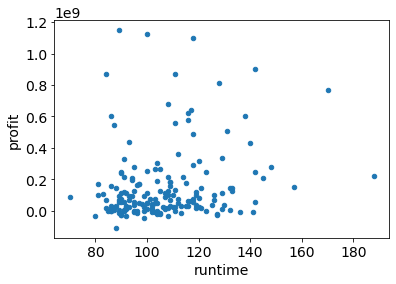

In [204]:
ax2 = df_sql_rt_db.plot.scatter(x='runtime',
                    y='profit',
                    colormap='viridis')

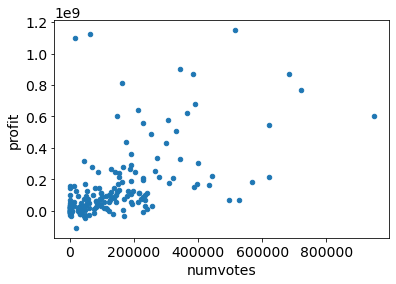

In [205]:
ax2 = df_sql_rt_db.plot.scatter(x='numvotes',
                    y='profit',
                    colormap='viridis')

In [ ]:
#Most profitable time of the year

In [251]:
df_budg_rt_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 1831
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_x               500 non-null    int64         
 1   release_date       500 non-null    datetime64[ns]
 2   movie              500 non-null    object        
 3   production_budget  500 non-null    float64       
 4   domestic_gross     500 non-null    float64       
 5   worldwide_gross    500 non-null    float64       
 6   profit             500 non-null    float64       
 7   profit_dom         500 non-null    float64       
 8   id_y               500 non-null    int64         
 9   synopsis           500 non-null    object        
 10  rating             500 non-null    object        
 11  genre              500 non-null    object        
 12  director           500 non-null    object        
 13  writer             437 non-null    object        
 14  theater_d

In [247]:
df_sql_budgets_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 1 to 2722
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1445 non-null   int64         
 1   release_date       1445 non-null   datetime64[ns]
 2   movie              1445 non-null   object        
 3   production_budget  1445 non-null   float64       
 4   domestic_gross     1445 non-null   float64       
 5   worldwide_gross    1445 non-null   float64       
 6   profit             1445 non-null   float64       
 7   profit_dom         1445 non-null   float64       
 8   movie_id           1445 non-null   object        
 9   primary_title      1445 non-null   object        
 10  averagerating      1445 non-null   float64       
 11  numvotes           1445 non-null   int64         
 12  genres             1444 non-null   object        
 13  start_year         1445 non-null   float64       
 14  primary_

In [250]:
#Most profitable genre
df_action  =df_sql_budgets_db[df_sql_budgets_db['genres'].str.contains("Action|Thriller|Crime|Mystery")==True]
df_drama   =df_sql_budgets_db[df_sql_budgets_db['genres'].str.contains("Drama|War|Family")==True]
df_romance =df_sql_budgets_db[df_sql_budgets_db['genres'].str.contains("Romance")==True]
df_horror  =df_sql_budgets_db[df_sql_budgets_db['genres'].str.contains("Horror")==True]
df_comedy  =df_sql_budgets_db[df_sql_budgets_db['genres'].str.contains("Comedy")==True]
df_docu    =df_sql_budgets_db[df_sql_budgets_db['genres'].str.contains("Documentary|Biography|History|News|Music")==True]
df_scifi   =df_sql_budgets_db[df_sql_budgets_db['genres'].str.contains("Sci-Fi")==True]
df_anime   =df_sql_budgets_db[df_sql_budgets_db['genres'].str.contains("Animation")==True]

In [221]:
df_list2  =[df_action,df_drama,df_horror,df_romance,df_comedy,df_scifi,df_docu,df_anime]
list_genres=['action','drama','horror','romance','comedy','sci-fi','docu','anime']

In [225]:
Lmeans_genre  = get_mean_values(df_list2,'profit')
Lstds_genres  = get_std_values(df_list2,'profit')
Lmeans_AR     = get_sum_values(df_list2,'averagerating')
Lstds_AR      = get_std_values(df_list2,'averagerating')
#Lmeans_runtime  = get_mean_values(df_list2,'runtime')
#Lstds_runtime   = get_std_values(df_list2,'runtime')
#Lstds_votes

4528.0
4928.4
976.4
1128.9
3035.8
850.2
1523.1
658.5


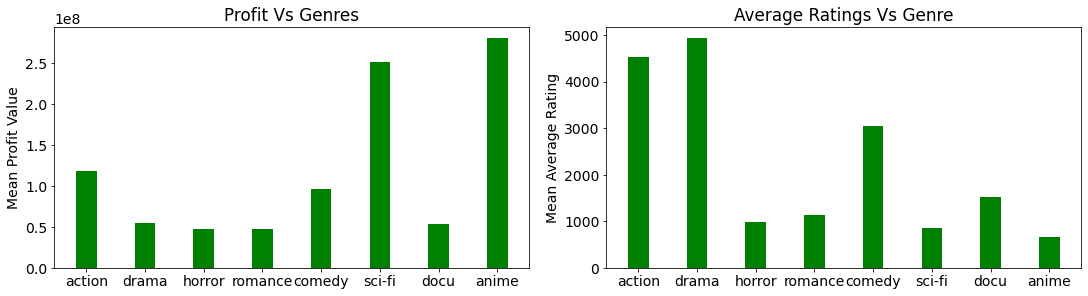

In [242]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), constrained_layout=True)
#axs[0,0].bar(list_genres, sum_votes_list,  color='green', width=0.35)
axs[1].bar(list_genres, Lmeans_AR,  color='green', width=0.35)#,yerr=Lstds_AR)
axs[0].bar(list_genres, Lmeans_genre,color ='green',width = 0.35)#,yerr=Lstds_genres)
#axs[1,1].scatter(means_genres_list,mean_votes_list, color ='green', label=list_genres)
axs[0].set_ylabel('Mean Profit Value')
axs[0].set_title('Profit Vs Genres')

axs[1].set_ylabel('Mean Average Rating')
axs[1].set_title('Average Ratings Vs Genre')

plt.show()

In [209]:
#Most Profitable director/runtime/writer/actor
df_profit_dir = (df_sql_budgets_db.groupby(['primary_name']).sum()).sort_values(by='profit',ascending=False).head(10)

In [210]:
df_profit_dir

,id,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,averagerating,numvotes,start_year,year
primary_name,,,,,,,,,,
"Anthony Russo, Joe Russo",40,720000000.0,1.346647e+09,3.902606e+09,3.182606e+09,626646789.0,24.1,1920685,6048.0,6048.0
James Wan,196,370000000.0,8.254690e+08,2.983618e+09,2.613618e+09,455468968.0,21.8,995635,6046.0,6046.0
Joss Whedon,31,555600000.0,1.082285e+09,2.920950e+09,2.365350e+09,526685415.0,15.4,1849249,4027.0,4027.0
Christopher Nolan,150,750000000.0,1.118801e+09,3.086180e+09,2.336180e+09,368801468.0,33.7,4994749,8053.0,8053.0
Michael Bay,167,648000000.0,7.778736e+08,2.911998e+09,2.263998e+09,129873593.0,23.5,956722,8055.0,8055.0
Peter Jackson,62,750000000.0,8.164902e+08,2.922948e+09,2.172948e+09,66490211.0,23.1,1723813,6039.0,6039.0
Francis Lawrence,254,522000000.0,1.149112e+09,2.543192e+09,2.021192e+09,627112056.0,34.2,1449439,10071.0,10071.0
Bryan Singer,298,628000000.0,6.708550e+08,2.383073e+09,1.755073e+09,42854965.0,29.3,1445228,8061.0,8061.0
Sam Mendes,62,500000000.0,5.044345e+08,1.990148e+09,1.490148e+09,4434452.0,14.6,944725,4027.0,4027.0


RGB is a way of making colors. You have to to provide an amount of red, green, blue, and the transparency value to the 

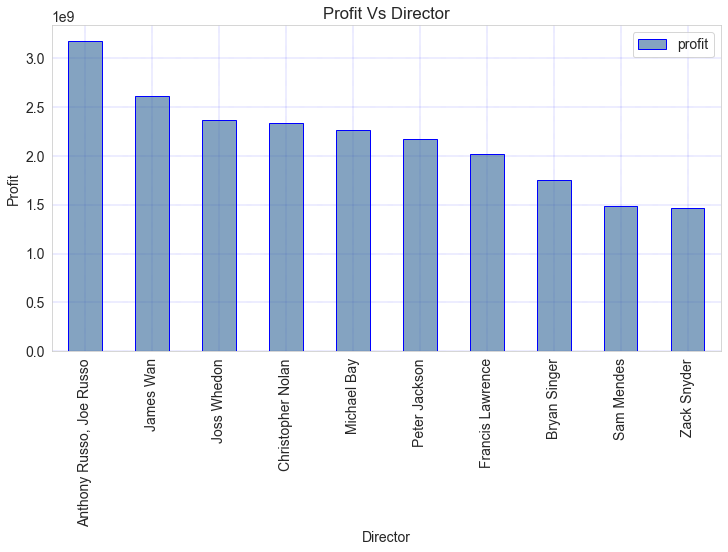

In [299]:
import seaborn as sns
sns.set_style("whitegrid")
ax1 = df_profit_dir.reset_index().plot(x='primary_name', y='profit', figsize=(12,6),kind="bar",
                                      rot =90, title="Profit Vs Director",color=(0.2, 0.4, 0.6, 0.6),  edgecolor='blue')
ax1.set_ylabel('Profit')
ax1.set_xlabel('Director')
ax1.grid(linestyle='--', linewidth='0.2', color='blue') 

In [219]:
df_sql_budgets_db

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,movie_id,primary_title,averagerating,numvotes,genres,start_year,primary_name,person_id,year
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,-169536125.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,6.6,447624,"Action,Adventure,Fantasy",2011.0,Rob Marshall,nm0551128,2011.0
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-307237650.0,tt6565702,Dark Phoenix,6.0,24451,"Action,Adventure,Sci-Fi",2019.0,Simon Kinberg,nm1334526,2019.0
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,128405868.0,tt2395427,Avengers: Age of Ultron,7.3,665594,"Action,Adventure,Sci-Fi",2015.0,Joss Whedon,nm0923736,2015.0
4,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,378815482.0,tt4154756,Avengers: Infinity War,8.5,670926,"Action,Adventure,Sci-Fi",2018.0,"Anthony Russo, Joe Russo","nm0751577, nm0751648",2018.0
5,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,-70975705.0,tt0974015,Justice League,6.5,329135,"Action,Adventure,Fantasy",2017.0,Zack Snyder,nm0811583,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,45,2017-01-27,Emily,27000.0,3547.0,3.547000e+03,-2.345300e+04,-23453.0,tt4393036,Emily,6.8,13,Drama,2017.0,Ryan Graves,nm6254824,2017.0
2714,49,2015-09-01,Exeter,25000.0,0.0,4.897920e+05,4.647920e+05,-25000.0,tt1945044,Exeter,4.5,5156,"Horror,Mystery,Thriller",2015.0,Marcus Nispel,nm1197971,2015.0
2719,52,2015-12-01,Dutch Kills,25000.0,0.0,0.000000e+00,-2.500000e+04,-25000.0,tt2759066,Dutch Kills,5.1,82,"Crime,Drama,Thriller",2015.0,Joseph Mazzella,nm3556672,2015.0
2721,59,2011-11-25,The Ridges,17300.0,0.0,0.000000e+00,-1.730000e+04,-17300.0,tt1781935,The Ridges,2.9,127,"Drama,Horror,Thriller",2011.0,Brandon Landers,nm4192760,2011.0


In [ ]:
#Most profitable time of the year
Lets use the dataframe has profit and year information but also has most number of entries

In [300]:
df_budgets_movie

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,335507625.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,-169536125.0
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-307237650.0
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,128405868.0
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,303181382.0
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,-7000.0
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,2.344950e+05,42482.0
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03,-3662.0
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03,-1400.0


In [307]:
mask = (df_budgets_movie['release_date'].dt.month >10) | (df_budgets_movie['release_date'].dt.month == 1)
df_nov_jan = df_budgets_movie.loc[mask]
mask = (df_budgets_movie['release_date'].dt.month >1) & (df_budgets_movie['release_date'].dt.month <= 4)
df_feb_apr = df_budgets_movie.loc[mask]
mask = (df_budgets_movie['release_date'].dt.month >4) & (df_budgets_movie['release_date'].dt.month <= 7)
df_may_jul = df_budgets_movie.loc[mask]
mask = (df_budgets_movie['release_date'].dt.month >7) & (df_budgets_movie['release_date'].dt.month <= 10)
df_aug_oct = df_budgets_movie.loc[mask]

In [308]:
#df_nov_jan
df_sql_budgets_db

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,335507625.0
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,303181382.0
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09,630662225.0
8,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,-70975705.0
9,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,5.796209e+08,-99925825.0
...,...,...,...,...,...,...,...,...
5761,62,2014-12-31,Stories of Our Lives,15000.0,0.0,0.000000e+00,-1.500000e+04,-15000.0
5764,65,2007-12-31,Tin Can Man,12000.0,0.0,0.000000e+00,-1.200000e+04,-12000.0
5772,73,2012-01-13,Newlyweds,9000.0,4584.0,4.584000e+03,-4.416000e+03,-4416.0
5776,77,2004-12-31,The Mongol King,7000.0,900.0,9.000000e+02,-6.100000e+03,-6100.0


In [309]:
df_feb_apr

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,378815482.0
13,14,2012-03-09,John Carter,275000000.0,73058679.0,2.827781e+08,7.778100e+06,-201941321.0
17,18,2016-03-25,Batman v Superman: Dawn of Justice,250000000.0,330360194.0,8.675003e+08,6.175003e+08,80360194.0
22,23,2017-04-14,The Fate of the Furious,250000000.0,225764765.0,1.234846e+09,9.848463e+08,-24235235.0
41,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,1.148258e+09,500059566.0
...,...,...,...,...,...,...,...,...
5765,66,2001-03-09,Dayereh,10000.0,673780.0,6.737800e+05,6.637800e+05,663780.0
5766,67,2006-04-28,Clean,10000.0,138711.0,1.387110e+05,1.287110e+05,128711.0
5769,70,1996-04-01,Bang,10000.0,527.0,5.270000e+02,-9.473000e+03,-9473.0
5773,74,1993-02-26,El Mariachi,7000.0,2040920.0,2.041928e+06,2.034928e+06,2033920.0


In [310]:
df_may_jul

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,-169536125.0
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-307237650.0
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,128405868.0
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,6.634204e+08,9420425.0
10,11,2012-07-20,The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,8.094391e+08,173139099.0
...,...,...,...,...,...,...,...,...
5767,68,2001-07-06,Cure,10000.0,94596.0,9.459600e+04,8.459600e+04,84596.0
5768,69,2004-05-28,On the Downlow,10000.0,1987.0,1.987000e+03,-8.013000e+03,-8013.0
5771,72,2015-05-19,Family Motocross,10000.0,0.0,0.000000e+00,-1.000000e+04,-10000.0
5775,76,2006-05-26,Cavite,7000.0,70071.0,7.164400e+04,6.464400e+04,63071.0


In [311]:
df_aug_oct

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom
79,80,2017-10-06,Blade Runner 2049,185000000.0,92054159.0,259357408.0,74357408.0,-92945841.0
86,87,2007-08-10,Rush Hour 3,180000000.0,140125968.0,256585882.0,76585882.0,-39874032.0
93,94,2018-08-10,The Meg,178000000.0,145443742.0,529530715.0,351530715.0,-32556258.0
99,100,2016-08-05,Suicide Squad,175000000.0,325100054.0,746059887.0,571059887.0,150100054.0
105,6,2009-08-07,G.I. Joe: The Rise of Cobra,175000000.0,150201498.0,302469017.0,127469017.0,-24798502.0
...,...,...,...,...,...,...,...,...
5752,53,1991-08-01,Slacker,23000.0,1227508.0,1227508.0,1204508.0,1204508.0
5770,71,2008-08-14,The Rise and Fall of Miss Thang,10000.0,401.0,401.0,-9599.0,-9599.0
5774,75,2004-10-08,Primer,7000.0,424760.0,841926.0,834926.0,417760.0
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.0,-1400.0,-1400.0


In [372]:
list_month  =["Nov-Jan","Feb-Apr","May-Jul","Aug-Oct"]

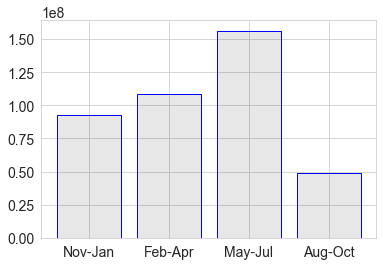

In [326]:
#x_pos = np.arange(len(list_month))
# Create bars with blue edge color
plt.bar(list_month, list_profit, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
#plt.bar(x_pos, list_profit, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
# Create names on the x-axis
#plt.xticks(x_pos,list_month)
# Show graph
plt.show()

In [329]:
def df_get_monthly_profits(df):
    mask       = (df['release_date'].dt.month >10) | (df['release_date'].dt.month == 1)
    df_nov_jan = df.loc[mask]
    mask       = (df['release_date'].dt.month >1) & (df['release_date'].dt.month <= 4)
    df_feb_apr = df.loc[mask]
    mask       = (df['release_date'].dt.month >4) & (df['release_date'].dt.month <= 7)
    df_may_jul = df.loc[mask]
    mask       = (df['release_date'].dt.month >7) & (df['release_date'].dt.month <= 10)
    df_aug_oct = df.loc[mask]
    list_profit =[df_nov_jan['profit'].mean(),df_feb_apr['profit'].mean(),df_may_jul['profit'].mean(), df_aug_oct['profit'].mean()]
    return list_profit    

In [330]:
profit1   =df_get_monthly_profits(df_budgets_movie)
profit2   =df_get_monthly_profits(df_sql_budgets_db)

In [331]:
profit1

[66654451.67617237, 43220879.69148936, 103911604.85897435, 29765619.056978233]

In [332]:
profit2

[93004913.53488372, 108768044.76567657, 156302981.1810089, 48948611.167464115]

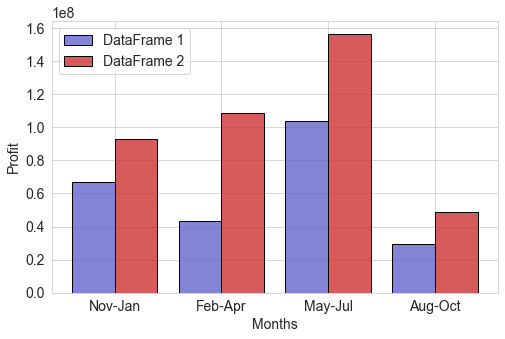

In [371]:
fig, ax1 = plt.subplots(figsize=(8,5))
x_axis = np.arange(len(list_month))
hhbars = ax1.bar(x_axis-0.2, profit1, width=0.4, color=(0.4, 0.4, 0.8, 0.8), edgecolor='black',label   ='DataFrame 1')
hhbars = ax1.bar(x_axis+0.2, profit2, width=0.4, color=(0.8, 0.2, 0.2, 0.8),  edgecolor='black', label ='DataFrame 2')

ax1.set_ylabel("Profit")
ax1.set_xlabel("Months")
ax1.set_xticks(x_axis)
ax1.set_xticklabels(list_month) # labels
plt.legend()
# Show graph
plt.show()